# MLMR2018 materials data science challenge

In [2]:
import numpy as np
import pandas as pd
import pymatgen as mg

from sklearn import metrics
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection

import matplotlib.pyplot as plt
from matplotlib import rcParams
plt.style.use('seaborn')
rcParams.update({'figure.autolayout': True,
                 'xtick.top': True,
                 'xtick.direction': 'in',
                 'ytick.right': True,
                 'ytick.direction': 'in',
                 'font.sans-serif': 'Arial',
                 'font.size': 14,
                 'savefig.dpi': 300,
                 'figure.dpi': 96
                })
%matplotlib notebook

## 0. Reload the data from where we left off

In [3]:
df = pd.read_hdf('data/data.h5', key='df_full', mode='r')
df_test = pd.read_hdf('data/data.h5', key='df_test', mode='r')
X = pd.read_hdf('data/data.h5', key='X', mode='r')
X_test = pd.read_hdf('data/data.h5', key='X_test', mode='r')

In [4]:
df

,Material Class,Composition Formula,Hydrogen Weight Percent,Heat of Formation (kJ/mol H2),Temperature (˚C),Pressure (Atmospheres Absolute),Author Year,Reference Number,Comment1,Comment2,Comment3,composition
3,A2B,Th1.5Ce.5Al,0.4,133,650,0.0003,"Van Vucht, 1963",492,NaN,NaN,NaN,"(Th, Ce, Al)"
4,A2B,Th2Al,0.8,130,500,0.001,"Van Vucht, 1963",492,NaN,NaN,NaN,"(Th, Al)"
17,A2B,Ti2Cu,2.2,130,500,0.12,"Kadel, 1978",523,NaN,NaN,NaN,"(Ti, Cu)"
29,A2B,Ti2Pd,1.4,90,NaN,NaN,"Kadel, 1978",523,NaN,NaN,NaN,"(Ti, Pd)"
37,A2B,Zr2Cu,1.3,144,600,0.003,"Pebler, 1966",12,NaN,NaN,NaN,"(Zr, Cu)"
38,A2B,Zr2Cu,1.3,142,700,0.02,"Kadel, 1979",429,NaN,NaN,NaN,"(Zr, Cu)"
43,A2B,Zr2Ni,1.3,183,604,0.003,"Pebler, 1966",12,NaN,NaN,NaN,"(Zr, Ni)"
69,A2B,Hf2Fe,1.1,70,277,0.38,"Aubertin, 1989",425,NaN,NaN,NaN,"(Hf, Fe)"
87,A2B,Mg1.5Ni,2.6,29.1,300,3.7,"Kuji, 2002",1492,NaN,Ball milled,NaN,"(Mg, Ni)"
88,A2B,Mg1.75Ni,2.8,26.6,300,4.5,"Kuji, 2002",1492,NaN,Ball milled,NaN,"(Mg, Ni)"


In [5]:
X.shape

(542, 132)

In [6]:
print('Main frame size: {}\n'.format(df.shape),
      'test frame size: {}\n'.format(df_test.shape),
      'Feature Array size: {}\n'.format(X.shape),
      'Test Features size: {}'.format(X_test.shape))

Main frame size: (542, 12)
 test frame size: (50, 8)
 Feature Array size: (542, 132)
 Test Features size: (50, 132)


## Start testing some Regression models

Standardize the training data for this step

In [7]:
# naive train/val split, without consideration of duplicate compositions

y = np.array(df['Heat of Formation (kJ/mol H2)'], dtype=float)
std = preprocessing.StandardScaler()
std.fit(X)
X_std, X_test_std = std.transform(X), std.transform(X_test)
X_std = pd.DataFrame(data=X_std, index=X.index, columns=X.columns)

X_train_std, X_val_std, y_train_std, y_val_std = model_selection.train_test_split(X_std, y, test_size=0.2, random_state=42)

# Also split the un-standardized set for later
X_train, X_val, y_train, y_val = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the input features for linear regression
# skip this for e.g. random forest...

print("Training Samples: {}".format(X_train_std.shape[0]))
print("Validation Samples: {}".format(X_val_std.shape[0]))

Training Samples: 433
Validation Samples: 109


<IPython.core.display.Javascript object>


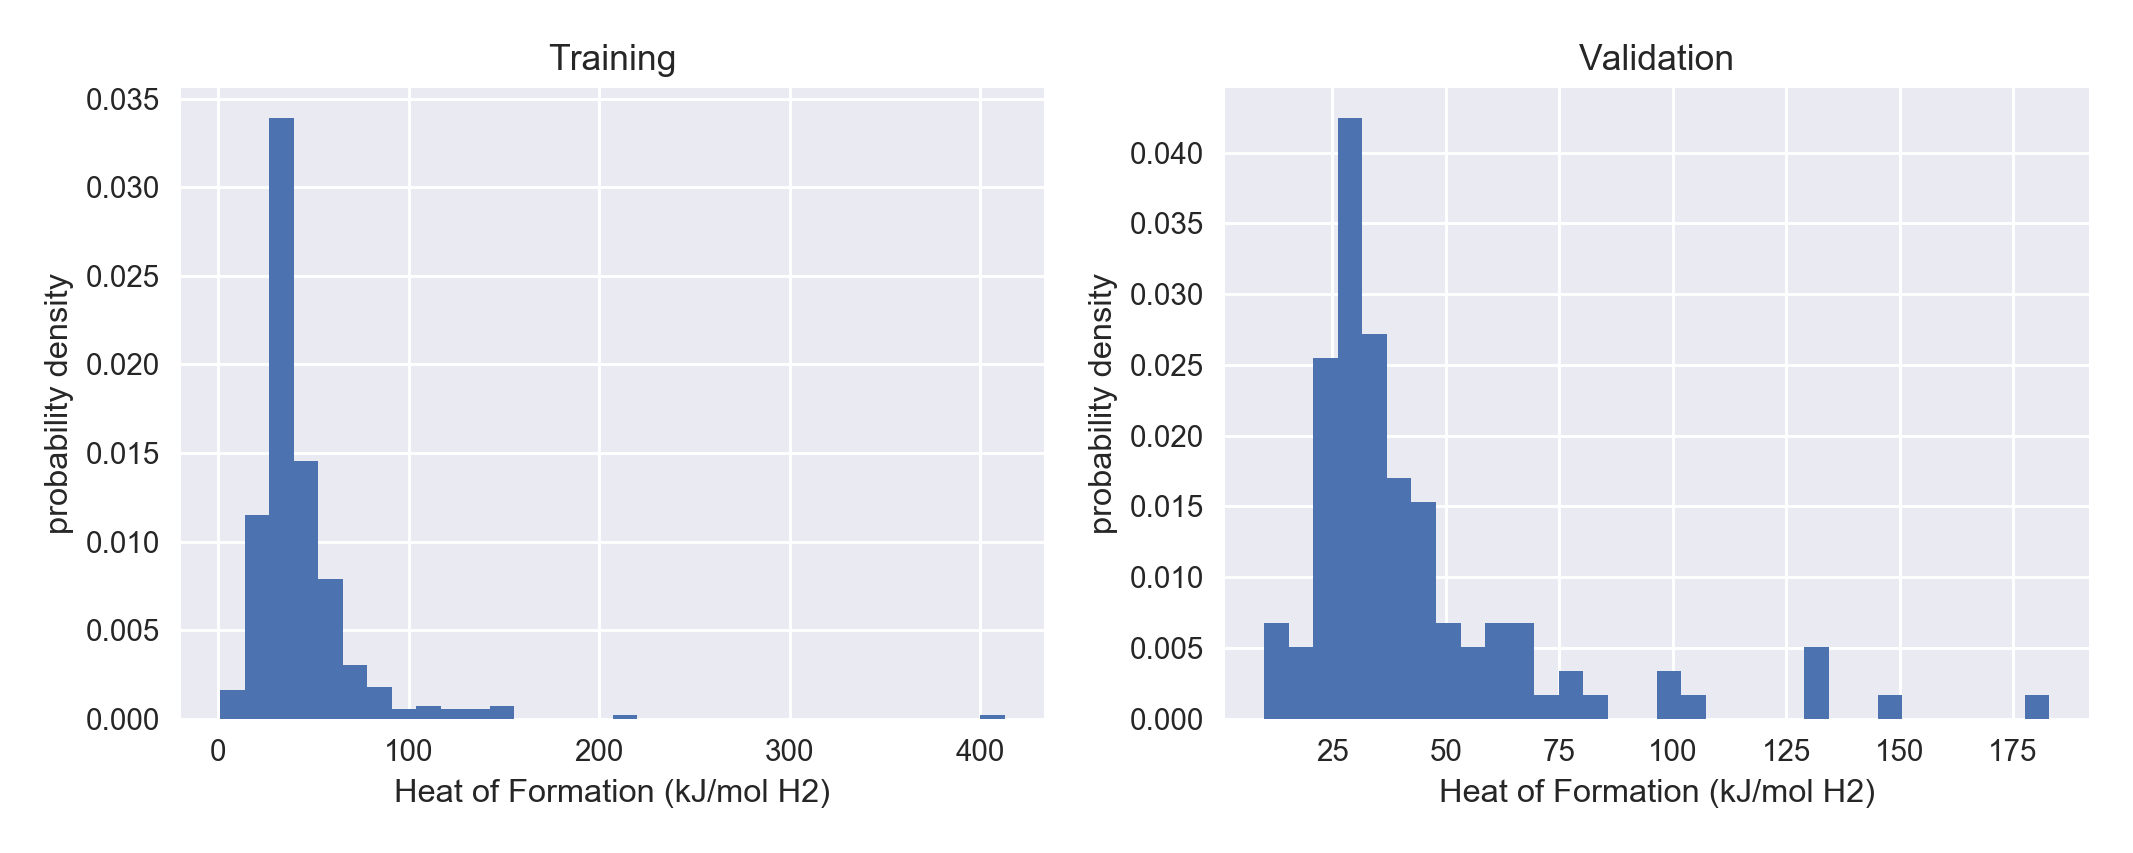

Text(0.5,1,'Validation')

In [8]:
fig = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(y_train, bins=32, density=True);
plt.xlabel('Heat of Formation (kJ/mol H2)'); plt.ylabel('probability density'); plt.title('Training')
plt.subplot(1,2,2)
plt.hist(y_val, bins=32, density=True);
plt.xlabel('Heat of Formation (kJ/mol H2)'); plt.ylabel('probability density'); plt.title('Validation')

Looks like we got a good split of the Hf values between training / validation.

<IPython.core.display.Javascript object>


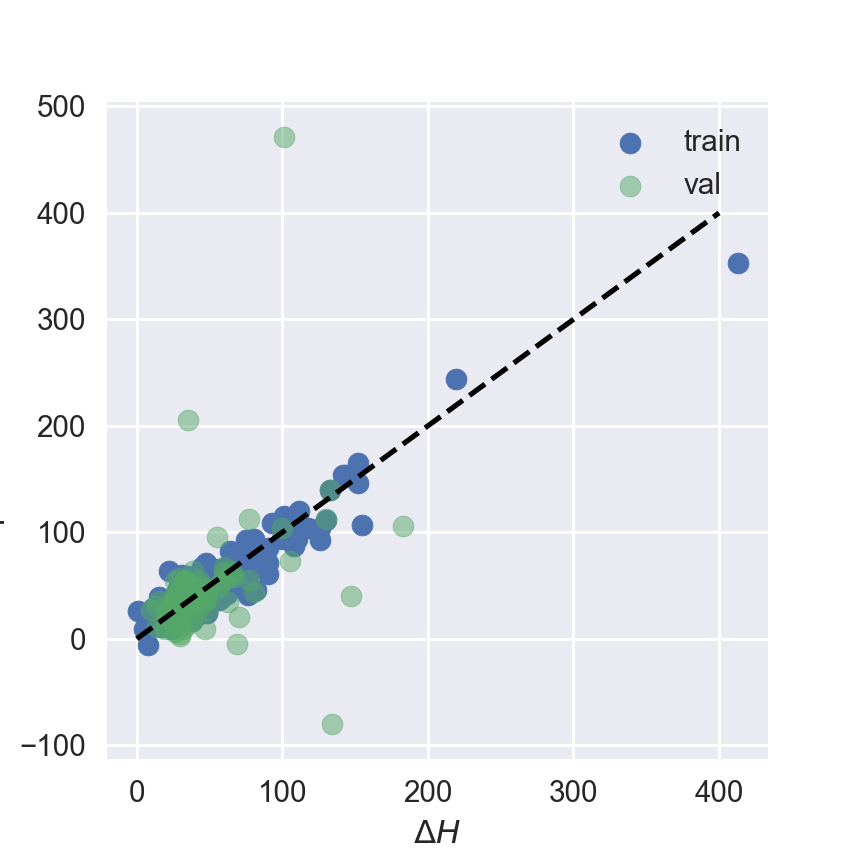

train: 7.642658263038625 kJ/mol
val: 19.9351426215302 kJ/mol


/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [9]:
fig, ax = plt.subplots(figsize=(4,4), tight_layout=False)

model = linear_model.LinearRegression()

model.fit(X_train_std, y_train)
ax.scatter(y_train, model.predict(X_train_std), label='train')
ax.scatter(y_val, model.predict(X_val_std), label='val', alpha=0.5)
ax.plot((0,400), (0,400), linestyle='--', color='k')

ax.set(xlabel=r'$\Delta H$', ylabel = r'predicted $\Delta H$');
ax.legend()

print('train:', metrics.mean_absolute_error(y_train, model.predict(X_train_std)), 'kJ/mol')
print('val:', metrics.mean_absolute_error(y_val, model.predict(X_val_std)), 'kJ/mol')

In [17]:
# print out (and save) test set predictions
pred_test = model.predict(X_test_std)

with open('hydride_test_set_predictions.txt', 'w') as textfile:
    for idx, row in df_test.iterrows():
        print('{}, {}'.format(row.comp, pred_test[idx]))
        print('{}, {}'.format(row.comp, pred_test[idx]), file=textfile)

V0.85Ti0.1Fe0.05, 39.16947929202309
Ti0.9Zr0.1Mn1.4Cr0.35V0.2Fe0.05, 34.25541679202309
TiCr1.9, 17.34135429202309
(Ti0.97Zr0.03)1.1Cr1.6Mn0.4, 33.37260429202309
TiCr1.5Mn0.25Fe0.25, 35.57572929202309
TiCr1.5Mn0.2Fe0.3, 34.31010429202309
TiCrMn, 9.372604292023091
(Ti0.8Zr0.2)1.1CrMn, 8.560104292023091
TiFe, 37.49760429202309
TiMn1.5, 34.56010429202309
TiCr1.75Al0.05, 37.56010429202309
TiCr1.7Al0.2, 31.79447929202309
TiCr1.6Mn0.2, 30.27885429202309
TiCr0.95Mn0.95, 24.56010429202309
TiCr1.75Ni0.1, 25.70072929202309
TiCr1.7Ni0.3, 25.56010429202309
TiCr1.9Mo0.01, 40.02104179202309
Ti1.1CrMn, 26.40385429202309
(Ti0.85Zr0.15)1.1CrMn, 7.794479292023091
(Ti0.85Zr0.15)1.1Cr0.95Mo0.05Mn, 36.38041679202309
(Ti0.85Zr0.15)1.1Cr0.9Mo0.1Mn, 35.71635429202309
(Ti0.85Zr0.15)1.1Cr0.85Mo0.15Mn, 35.23197929202309
(Ti0.85Zr0.15)1.1Cr0.98W0.02Mn, 24.68510429202309
(Ti0.85Zr0.15)1.1Cr0.95W0.05Mn, 24.90385429202309
(Ti0.85Zr0.15)1.1Cr0.9W0.1Mn, 25.34135429202309
TiCr1.6Mn0.2Fe0.2, 34.96635429202309
TiCr1.58Mn0

### 4. Baseline challenge

Random forest regression using magpie features. (**Don't apply standardization** -- this typically isn't necessary for tree-based models).

#### reproduce Jae's results with 10-fold randomized CV (on the training set)
- compare your 10-fold cross-validation performance with the paper
- save your predictions on the independent test set -- we'll evaluate them at the end of the challenge!
- can you do a feature importance analysis? What's features are important for these hydride materials?
- justify/interpret the model performance

In [10]:
# Random forest modeling and evaluation here...
from sklearn import ensemble

# try to match Weka defaults...
model = ensemble.RandomForestRegressor(n_estimators=100, max_features='log2')
cv_pred = model_selection.cross_val_predict(model, X, y, cv=10, verbose=True)

/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.8s finished


<IPython.core.display.Javascript object>


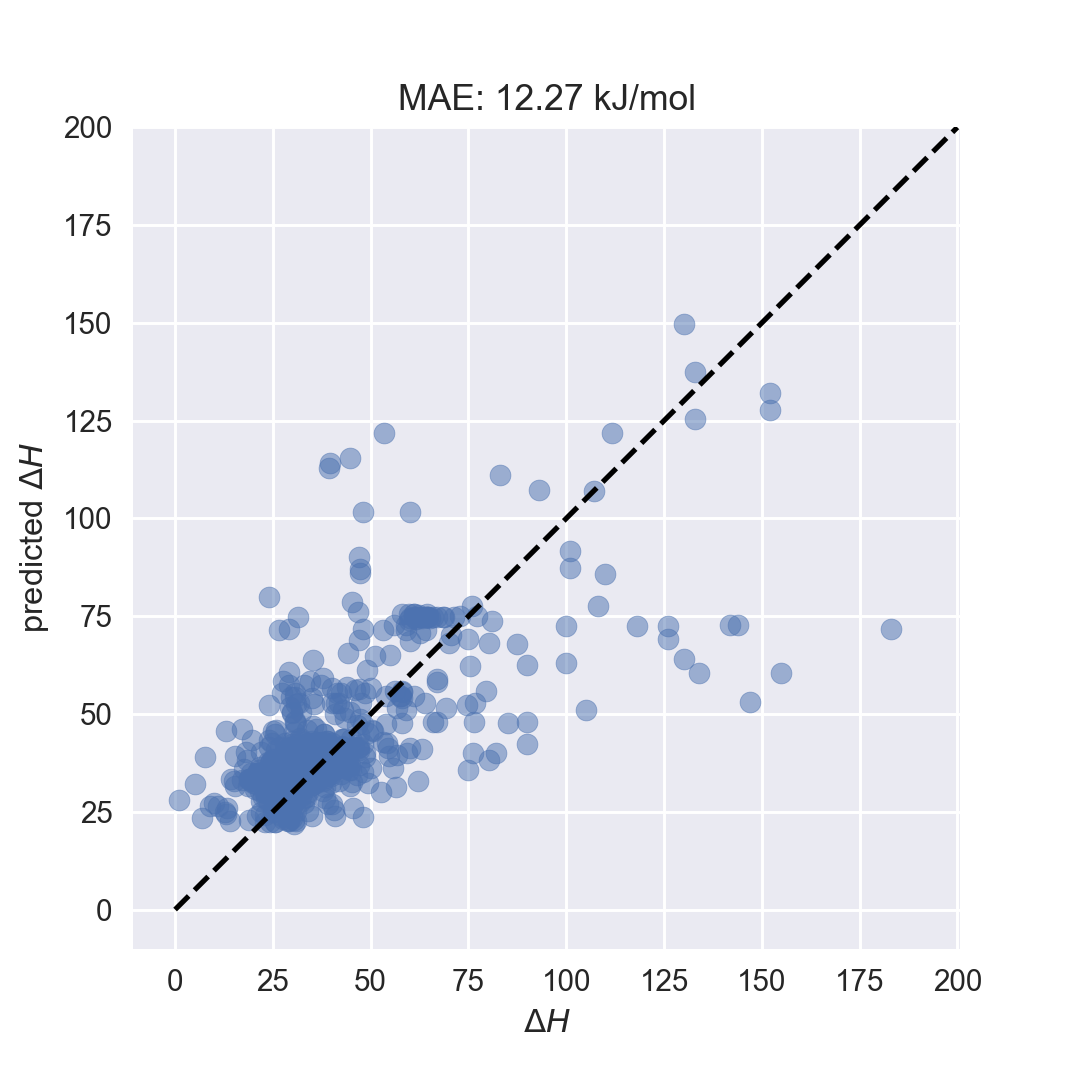

In [11]:
def parity_plot(y_true, y_pred, newfig=True, figsize=(5,5), lim=450, title=''):
    if newfig:
        plt.figure(figsize=figsize,
                   tight_layout=False)
        
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot((0,lim), (0,lim), linestyle='--', color='k')
    plt.xlim([-10,lim]); plt.ylim([-10,lim])
    plt.gca().set_aspect('equal','datalim')

    plt.xlabel(r'$\Delta H$')
    plt.ylabel(r'predicted $\Delta H$')
    plt.title(title + 'MAE: {} kJ/mol'.format(np.round(metrics.mean_absolute_error(y_true, y_pred),
                                               decimals=2)))

parity_plot(y, cv_pred, lim=200)

## Define a generic model fitting and evaluation function

In [12]:
# Generic Model Evaluation Function...

from scipy import stats
from sklearn import ensemble

def eval_model(estimator, X, y, hypes=None, n_splits=5, print_name=False):
    
    if print_name:
        print(estimator)
    
    cv = model_selection.KFold(n_splits=n_splits, shuffle=True)

    score = pd.DataFrame(columns=pd.MultiIndex.from_product([['train', 'val'], ['mae', 'pearson', 'spearman']]))
    
    for idx, (train, val) in enumerate(cv.split(X)):
        
        model_i = estimator() # Would eventually like to be able to pass hyperparameters here
        model_i.fit(X.iloc[train], y[train])

        # MAE
        score.loc[idx, ('train','mae')] = metrics.mean_absolute_error(y[train], model_i.predict(X.iloc[train]))
        score.loc[idx, ('val','mae')] = metrics.mean_absolute_error(y[val], model_i.predict(X.iloc[val]))

        # pearson -- print just the coefficient; throw away the p-value
        score.loc[idx, ('train','pearson')] = stats.pearsonr(y[train], model_i.predict(X.iloc[train]))[0]
        score.loc[idx, ('val','pearson')] = stats.pearsonr(y[val], model_i.predict(X.iloc[val]))[0]

        # spearman -- print just the coefficient; throw away the p-value
        score.loc[idx, ('train','spearman')] = stats.spearmanr(y[train], model_i.predict(X.iloc[train]))[0]
        score.loc[idx, ('val','spearman')] = stats.spearmanr(y[val], model_i.predict(X.iloc[val]))[0]
        
    model_i.fit(X, y)
    
    return score, model_i

## Let's fit every regression model sklearn has to offer.

Fit with scaled features "Xs"

In [13]:
lin_mods = pd.Series([s for s in vars(linear_model)['__all__'] if 'Classifier' not in s])
lin_mods

0                    ARDRegression
1                    BayesianRidge
2                       ElasticNet
3                     ElasticNetCV
4                            Hinge
5                            Huber
6                   HuberRegressor
7                             Lars
8                           LarsCV
9                            Lasso
10                         LassoCV
11                       LassoLars
12                     LassoLarsCV
13                     LassoLarsIC
14                LinearRegression
15                             Log
16              LogisticRegression
17            LogisticRegressionCV
18                   ModifiedHuber
19             MultiTaskElasticNet
20           MultiTaskElasticNetCV
21                  MultiTaskLasso
22                MultiTaskLassoCV
23       OrthogonalMatchingPursuit
24     OrthogonalMatchingPursuitCV
25      PassiveAggressiveRegressor
26                      Perceptron
27                 RandomizedLasso
28    RandomizedLogi

In [14]:
mod_idx = [0,1,3,6,10,30]
df_mods = pd.DataFrame()
df_mods['name'] = lin_mods.loc[mod_idx].copy()
df_mods.reset_index(inplace=True, drop=True)
df_mods

,name
0,ARDRegression
1,BayesianRidge
2,ElasticNetCV
3,HuberRegressor
4,LassoCV
5,RidgeCV


In [23]:
df_mods[['scores','estimator']] = df_mods.apply(lambda row: eval_model(getattr(linear_model, row['name']), X_std, y, print_name=True),
                                                axis=1,
                                                result_type='expand')

<class 'sklearn.linear_model.bayes.ARDRegression'>
<class 'sklearn.linear_model.bayes.BayesianRidge'>
<class 'sklearn.linear_model.coordinate_descent.ElasticNetCV'>


/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

<class 'sklearn.linear_model.huber.HuberRegressor'>


/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


<class 'sklearn.linear_model.coordinate_descent.LassoCV'>


/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. 

<class 'sklearn.linear_model.ridge.RidgeCV'>


In [24]:
df_mods[['mae','mae_std']] = df_mods.apply(lambda row: row['scores'][('val','mae')].agg(['mean','std']),
                                           axis=1, result_type='expand')
df_mods

,name,scores,estimator,mae,mae_std
0,ARDRegression,train val ...,"ARDRegression(alpha_1=1e-06, alpha_2=1e-06, co...",13.678758,3.016739
1,BayesianRidge,train val ...,"BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, co...",12.912225,2.078654
2,ElasticNetCV,train val ...,"ElasticNetCV(alphas=None, copy_X=True, cv=None...",11.919093,2.303629
3,HuberRegressor,train val ...,"HuberRegressor(alpha=0.0001, epsilon=1.35, fit...",11.591468,1.727944
4,LassoCV,train val ...,"LassoCV(alphas=None, copy_X=True, cv=None, eps...",12.517233,1.218333
5,RidgeCV,train val ...,"RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_...",12.306787,1.636381


<IPython.core.display.Javascript object>


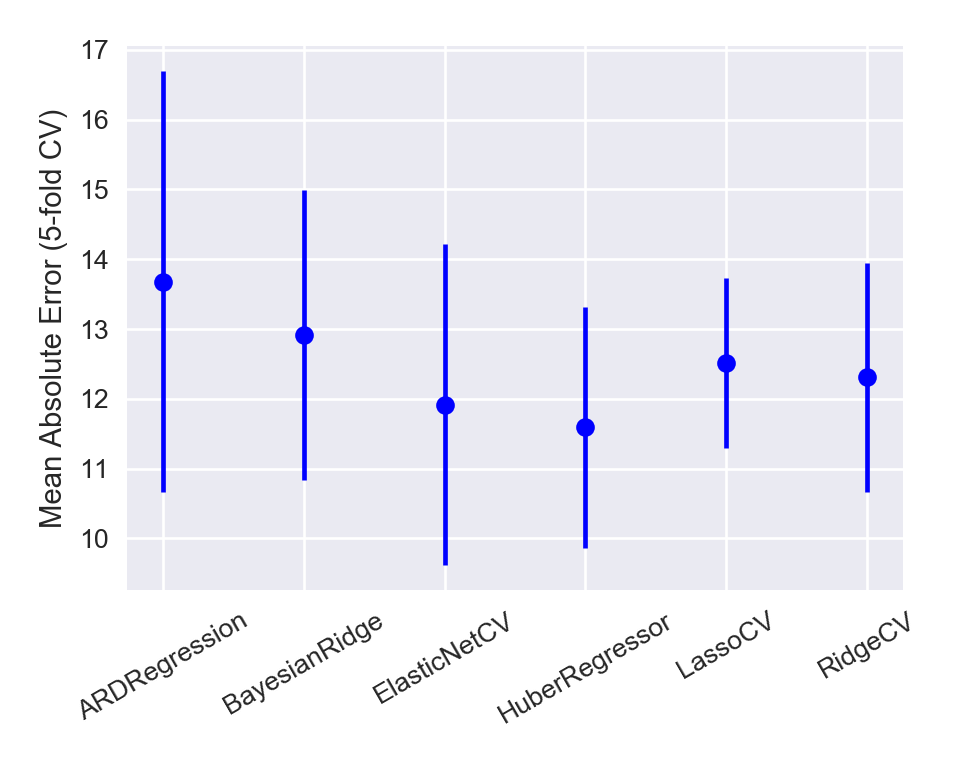

Text(0,0.5,'Mean Absolute Error (5-fold CV)')

In [33]:
plt.figure(figsize=(5,4))
plt.errorbar('name','mae',yerr='mae_std', fmt='bo', data=df_mods)
plt.xticks(rotation=30)
plt.ylabel('Mean Absolute Error (5-fold CV)')

Parity plot the Huber Regressor...

<IPython.core.display.Javascript object>


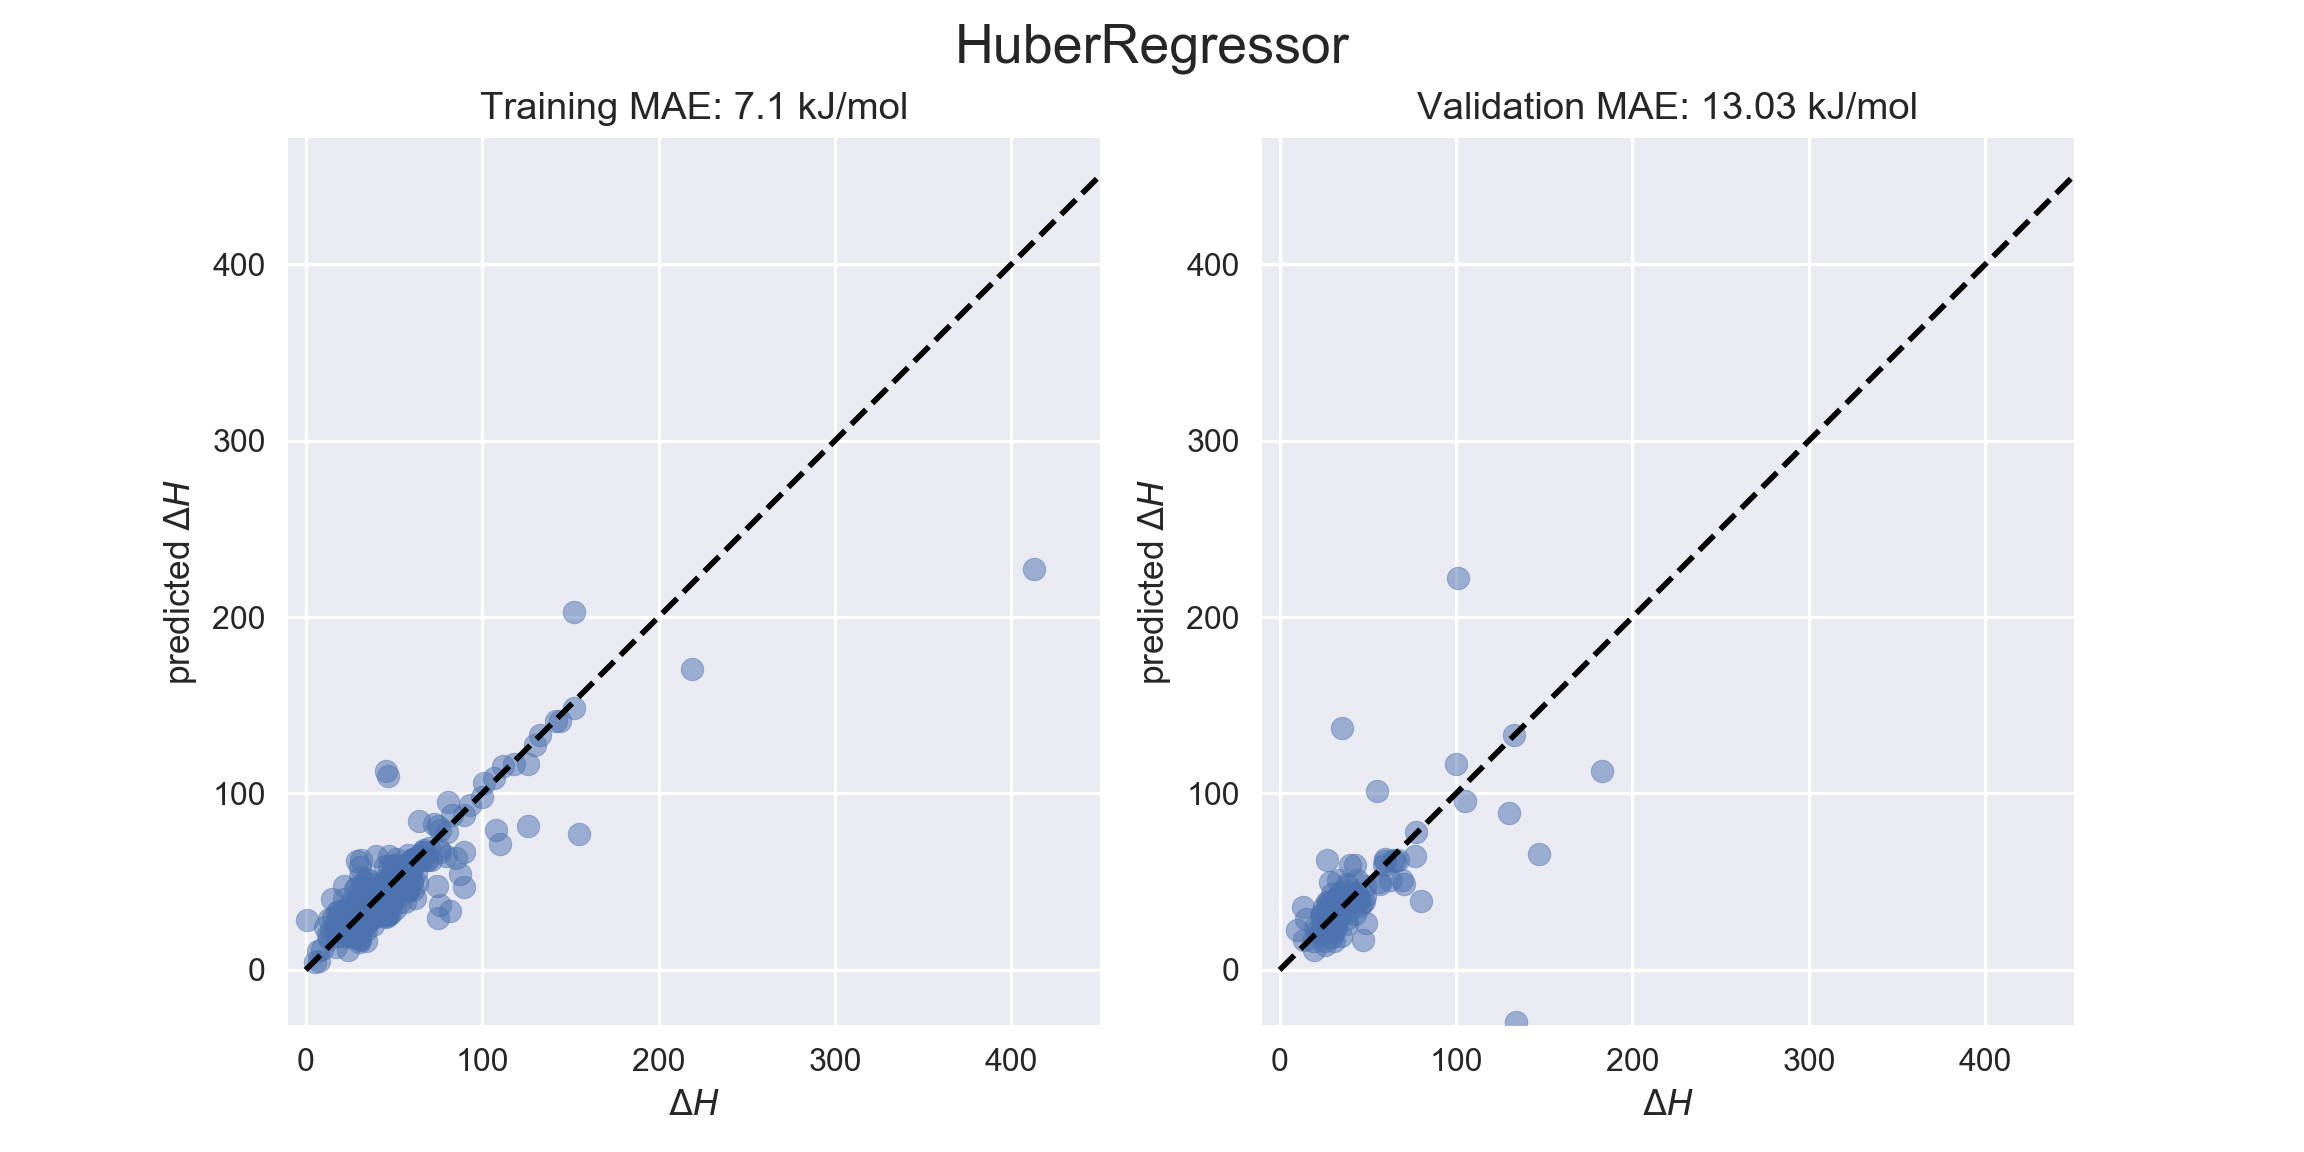

/anaconda/envs/pyTen/lib/python3.6/site-packages/sklearn/utils/__init__.py:93: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(mask.dtype, np.int):


Text(0.5,0.98,'HuberRegressor')

In [383]:
model_loc = 3
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train,
            df_mods.loc[model_loc,'estimator'].fit(X_train_std,y_train_std).predict(X_train_std),
            newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val,
            df_mods.loc[model_loc,'estimator'].fit(X_train_std,y_train_std).predict(X_val_std),
            newfig=False, title='Validation ')
plt.gcf().suptitle('{}'.format(df_mods.loc[model_loc,'name']))

## Try same procedure on some ensemble models
Remember to fit with un-scaled features "X"

In [15]:
ens = pd.Series([s for s in vars(ensemble)['__all__'] if 'Classifier' not in s])
ens

0                  BaseEnsemble
1         RandomForestRegressor
2          RandomTreesEmbedding
3           ExtraTreesRegressor
4              BaggingRegressor
5               IsolationForest
6     GradientBoostingRegressor
7             AdaBoostRegressor
8                       bagging
9                        forest
10            gradient_boosting
11           partial_dependence
12              weight_boosting
dtype: object

In [16]:
df_ens = pd.DataFrame()
df_ens['name'] = ens.loc[[1,4,6,7]]
df_ens

,name
1,RandomForestRegressor
4,BaggingRegressor
6,GradientBoostingRegressor
7,AdaBoostRegressor


In [17]:
df_ens[['scores','estimator']] = df_ens.apply(lambda row: eval_model(getattr(ensemble, row['name']), X, y, print_name=True, n_splits=10),
                                              axis=1,
                                              result_type='expand')

<class 'sklearn.ensemble.forest.RandomForestRegressor'>
<class 'sklearn.ensemble.bagging.BaggingRegressor'>
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostRegressor'>


In [18]:
df_ens[['mae','mae_std']] = df_ens.apply(lambda row: row['scores'][('val','mae')].agg(['mean','std']),
                                           axis=1, result_type='expand')
df_ens

,name,scores,estimator,mae,mae_std
1,RandomForestRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",9.175724,2.913596
4,BaggingRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",9.607082,2.592982
6,GradientBoostingRegressor,train val ...,([DecisionTreeRegressor(criterion='friedman_ms...,8.992508,2.228509
7,AdaBoostRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",11.769073,1.659029


<IPython.core.display.Javascript object>


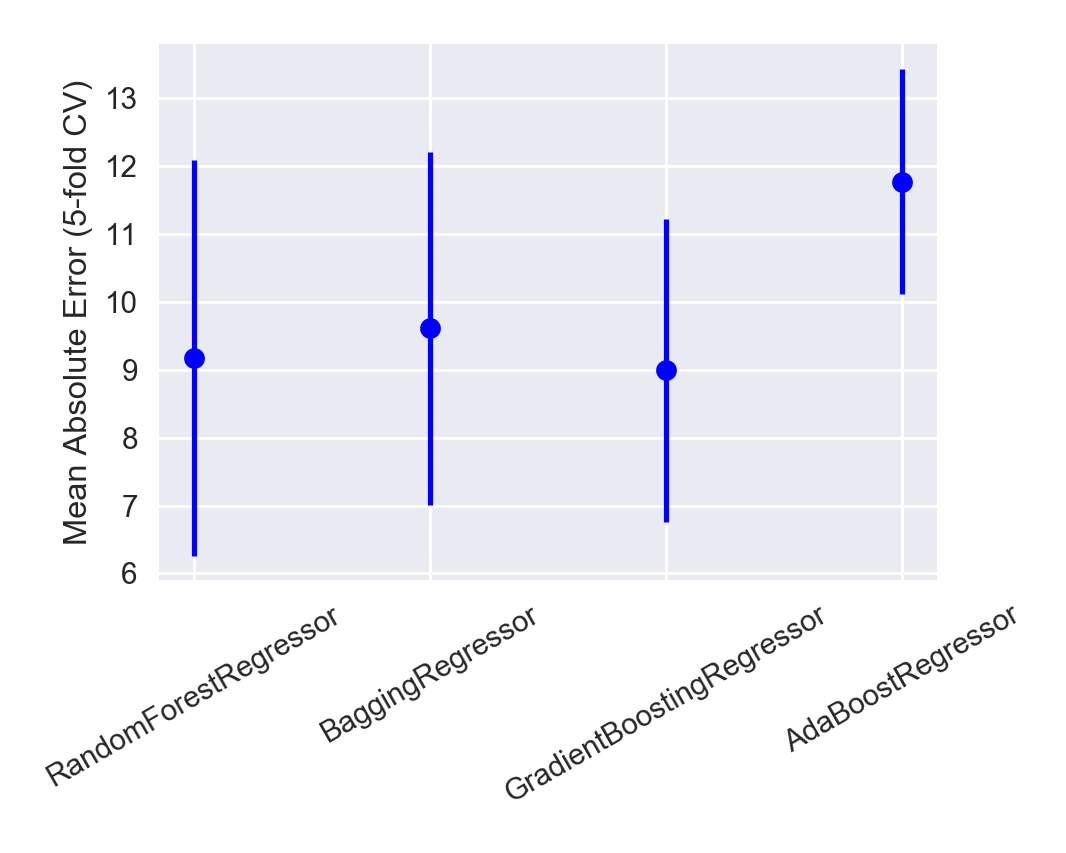

Text(0,0.5,'Mean Absolute Error (5-fold CV)')

In [20]:
plt.figure(figsize=(5,4))
plt.errorbar('name','mae',yerr='mae_std', fmt='bo', data=df_ens)
plt.xticks(rotation=30)
plt.ylabel('Mean Absolute Error (5-fold CV)')

Ok, so what's up with our RandomForest now? Why is it suddenly way better?

<IPython.core.display.Javascript object>


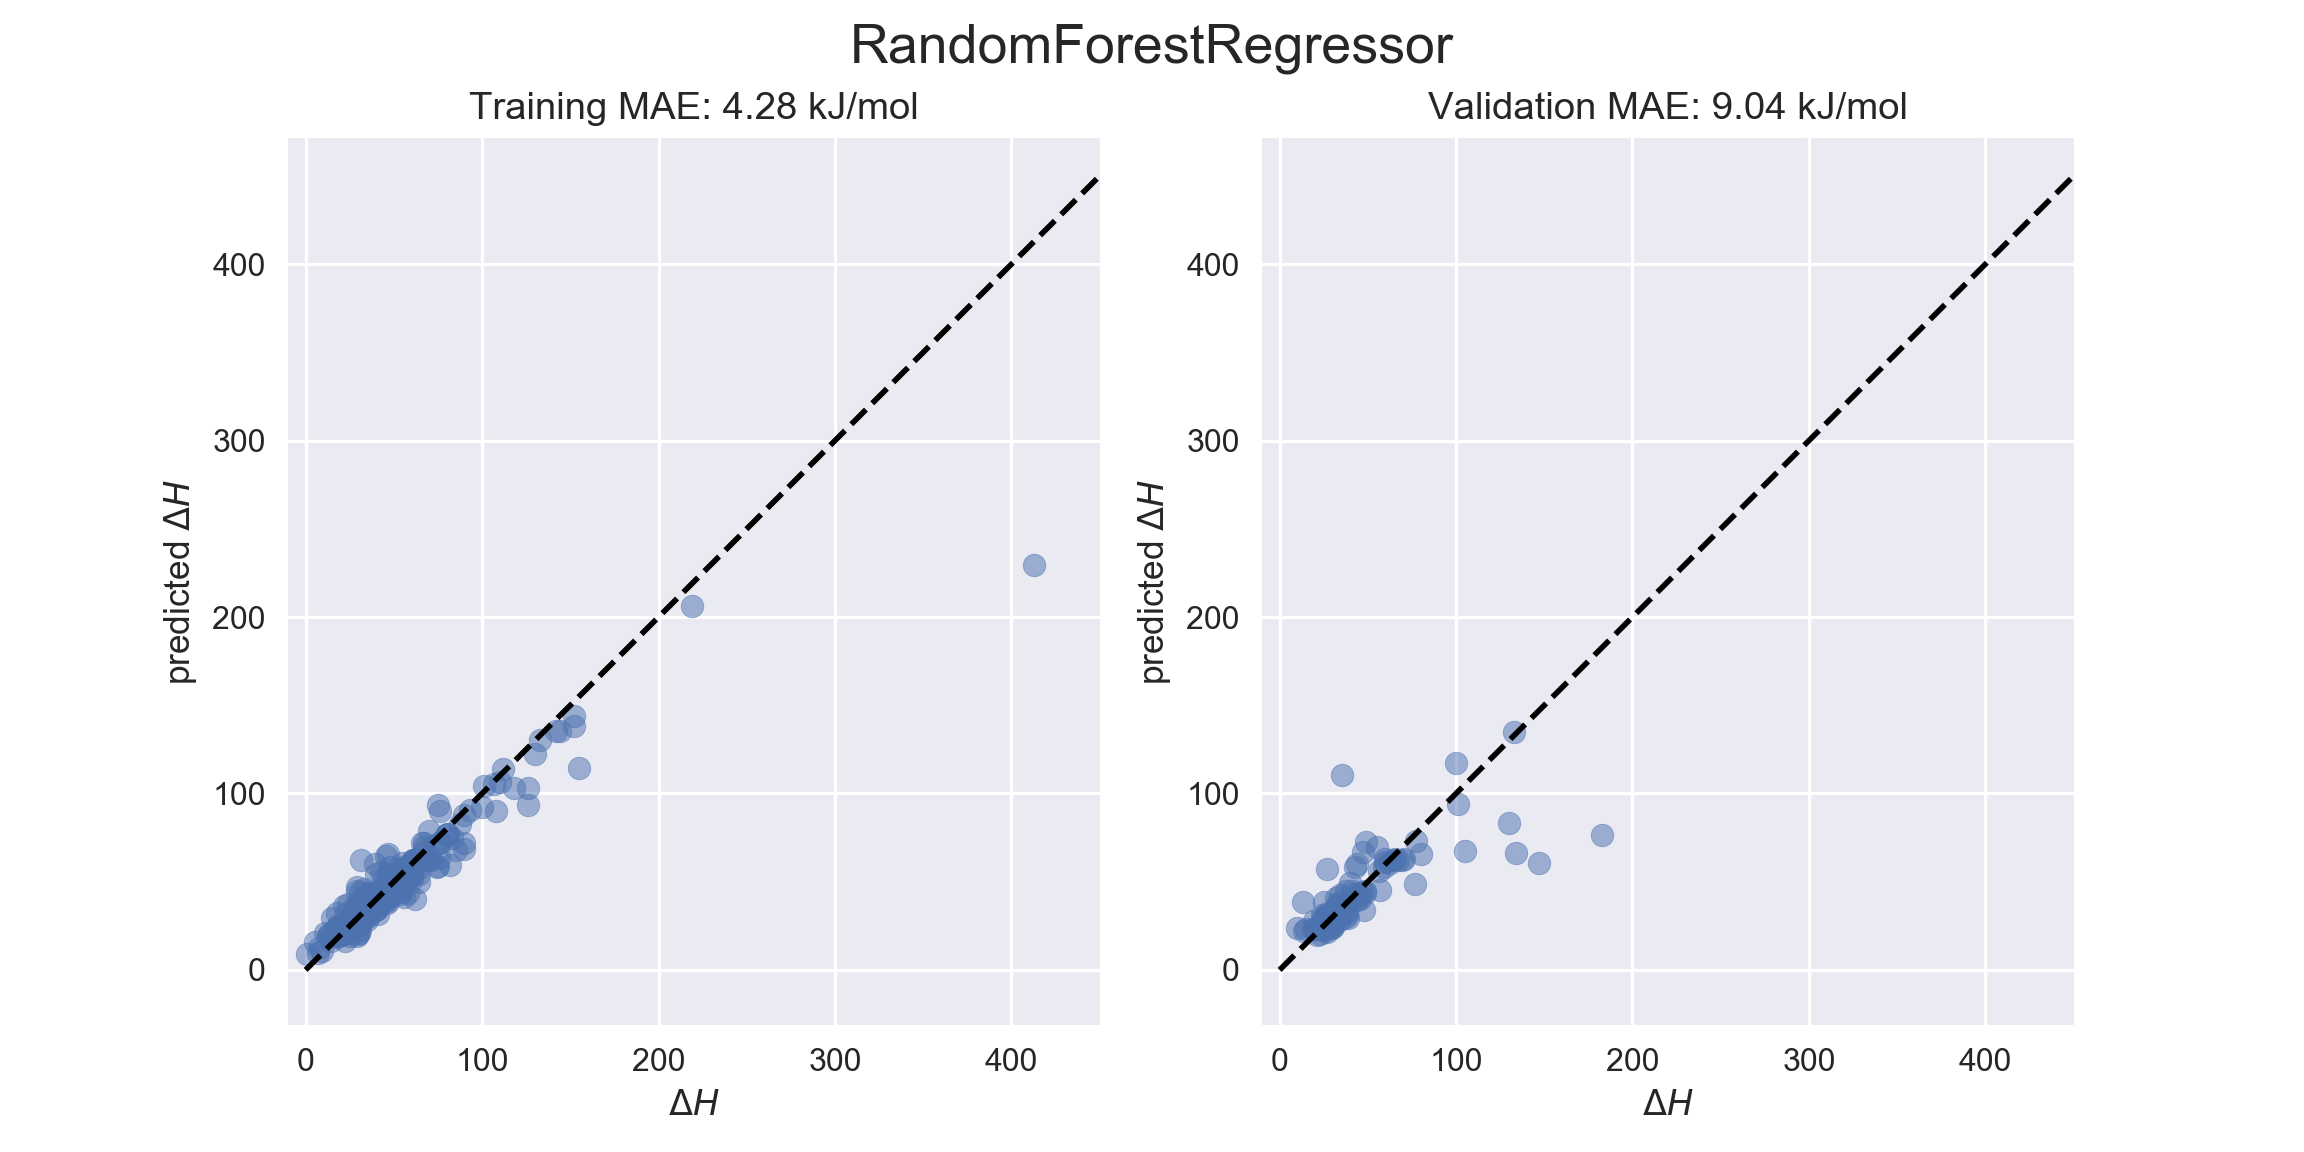

Text(0.5,0.98,'RandomForestRegressor')

In [390]:
from sklearn.base import clone
model_num = 1
estimator_temp = clone(df_ens.loc[model_num,'estimator'])
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, estimator_temp.fit(X_train,y_train).predict(X_train), newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val, estimator_temp.fit(X_train,y_train).predict(X_val), newfig=False, title='Validation ')
plt.gcf().suptitle(df_ens.loc[model_num, 'name'])

<IPython.core.display.Javascript object>


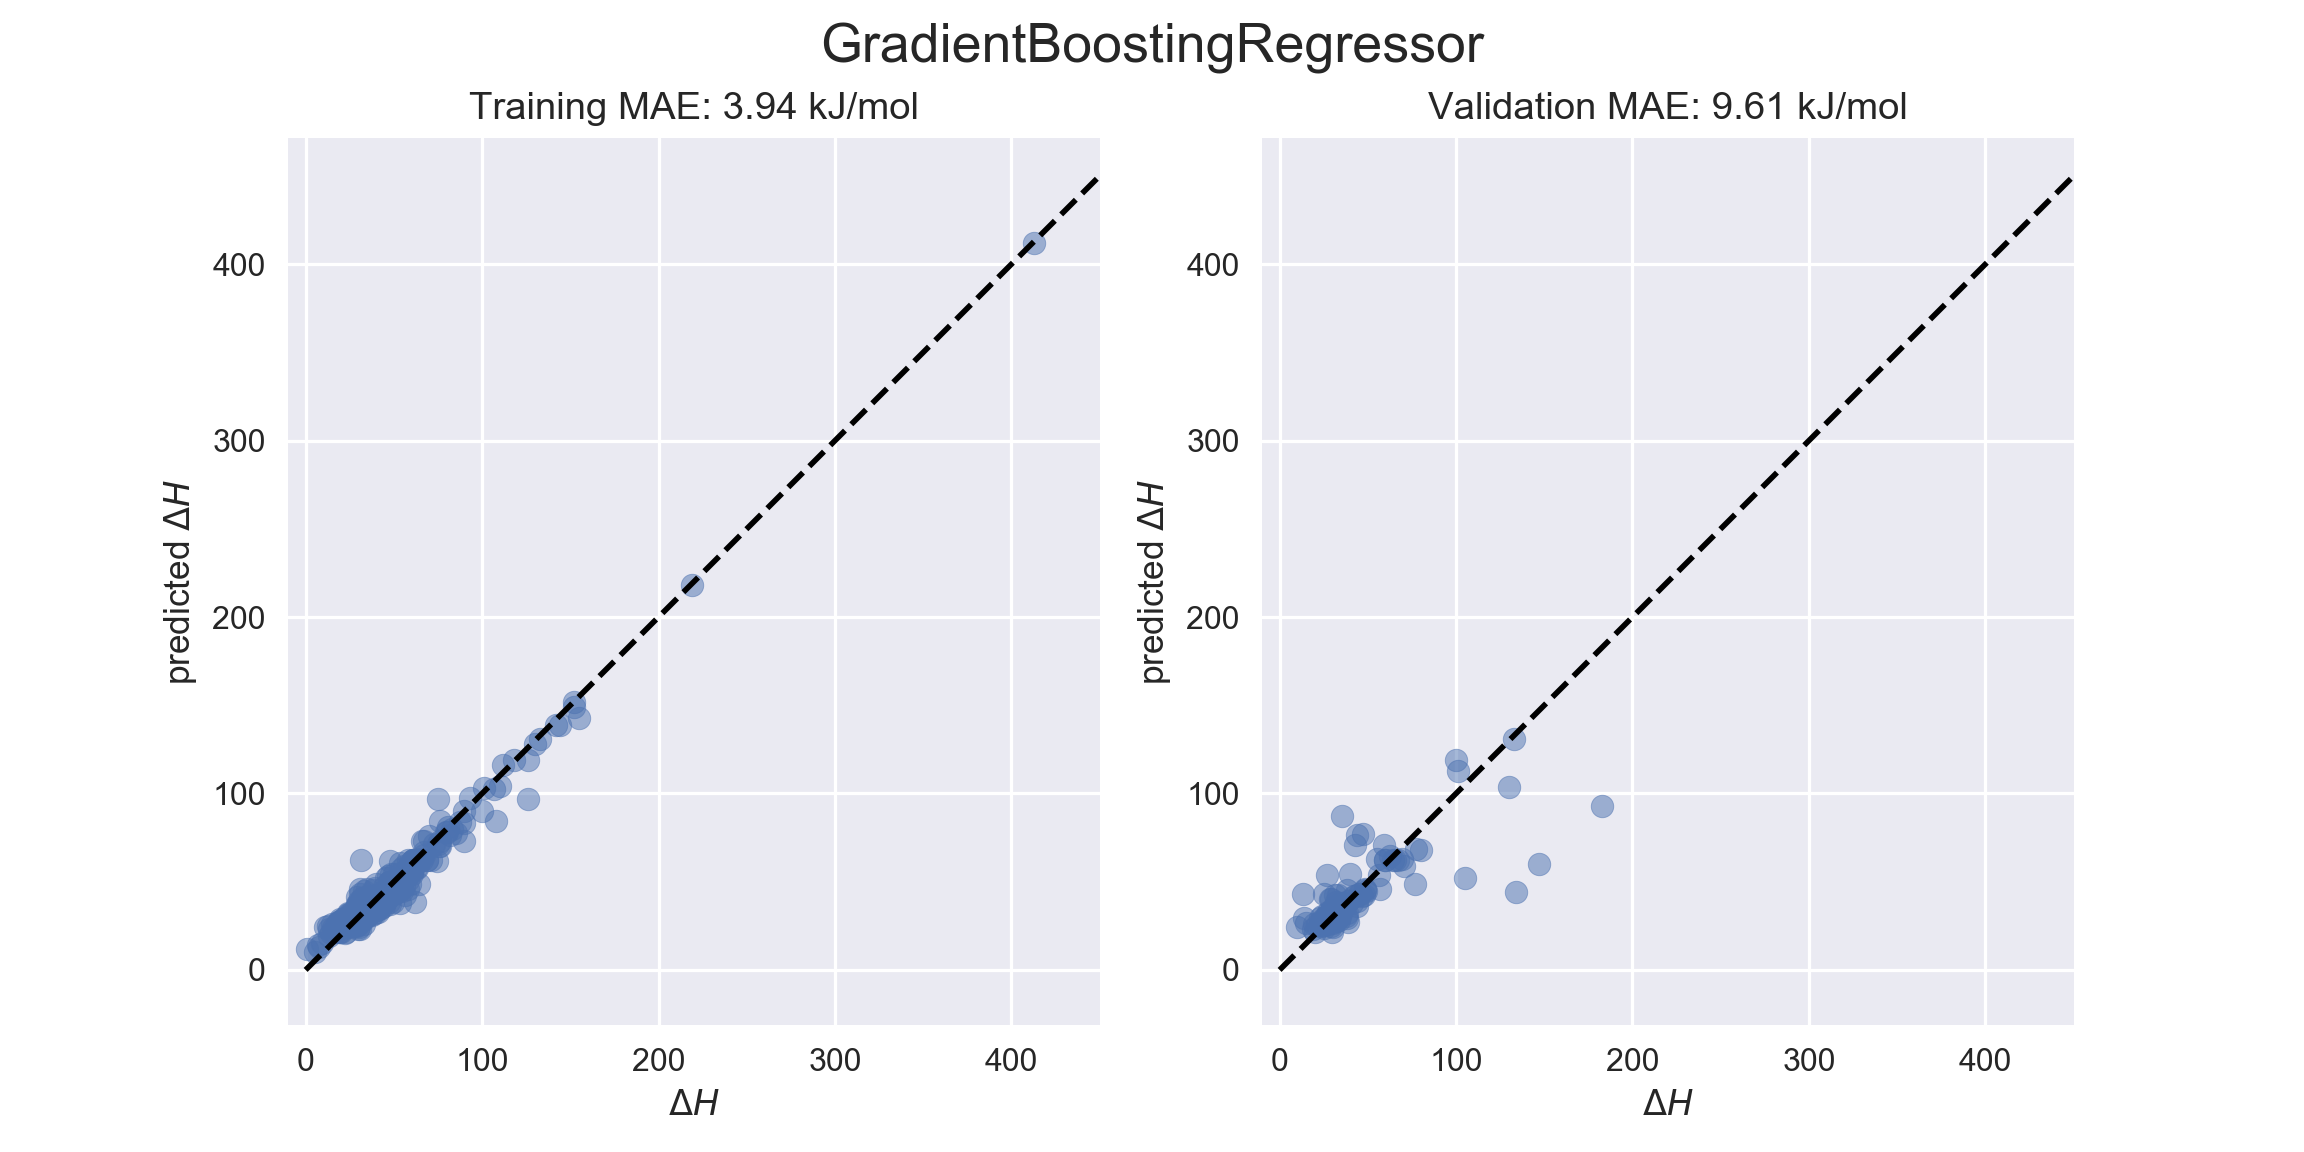

Text(0.5,0.98,'GradientBoostingRegressor')

In [391]:
model_num = 6
estimator_temp = clone(df_ens.loc[model_num,'estimator'])
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, estimator_temp.fit(X_train,y_train).predict(X_train), newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val, estimator_temp.fit(X_train,y_train).predict(X_val), newfig=False, title='Validation ')
plt.gcf().suptitle(df_ens.loc[model_num, 'name'])

## Let's try a Grid Search on the hyperparameters of Gradient Boosting

In [392]:
from sklearn.model_selection import GridSearchCV
estimator = clone(df_ens.loc[6,'estimator'])
estimator.loss = 'lad'

parameters = {'max_depth': [3, 4, 5],
              'learning_rate': [0.08, 0.1, 0.12],
              'n_estimators': [80, 100, 120],
              'subsample': [0.9, 0.95, 1]
             }
reg = GridSearchCV(estimator, parameters, cv=4)
reg.fit(X, y)

GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [3, 4, 5], 'learning_rate': [0.08, 0.1, 0.12], 'n_estimators': [80, 100, 120], 'subsample': [0.9, 0.95, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [393]:
df_res = pd.DataFrame(reg.cv_results_)
df_res.sort_values('rank_test_score')[['param_learning_rate','param_max_depth','param_n_estimators','param_subsample','mean_test_score','std_test_score']][:5]

,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,mean_test_score,std_test_score
72,0.12,5,80,0.9,0.205627,0.111174
76,0.12,5,100,0.95,0.196324,0.182642
35,0.1,3,120,1,0.194440,0.167918
64,0.12,4,80,0.95,0.190379,0.178899
63,0.12,4,80,0.9,0.187455,0.094748


The standard deviation of the testing score is very large for each hyperparameter set. It seems not to matter very much. Let's go with the "top ranked" model anyway.

<IPython.core.display.Javascript object>


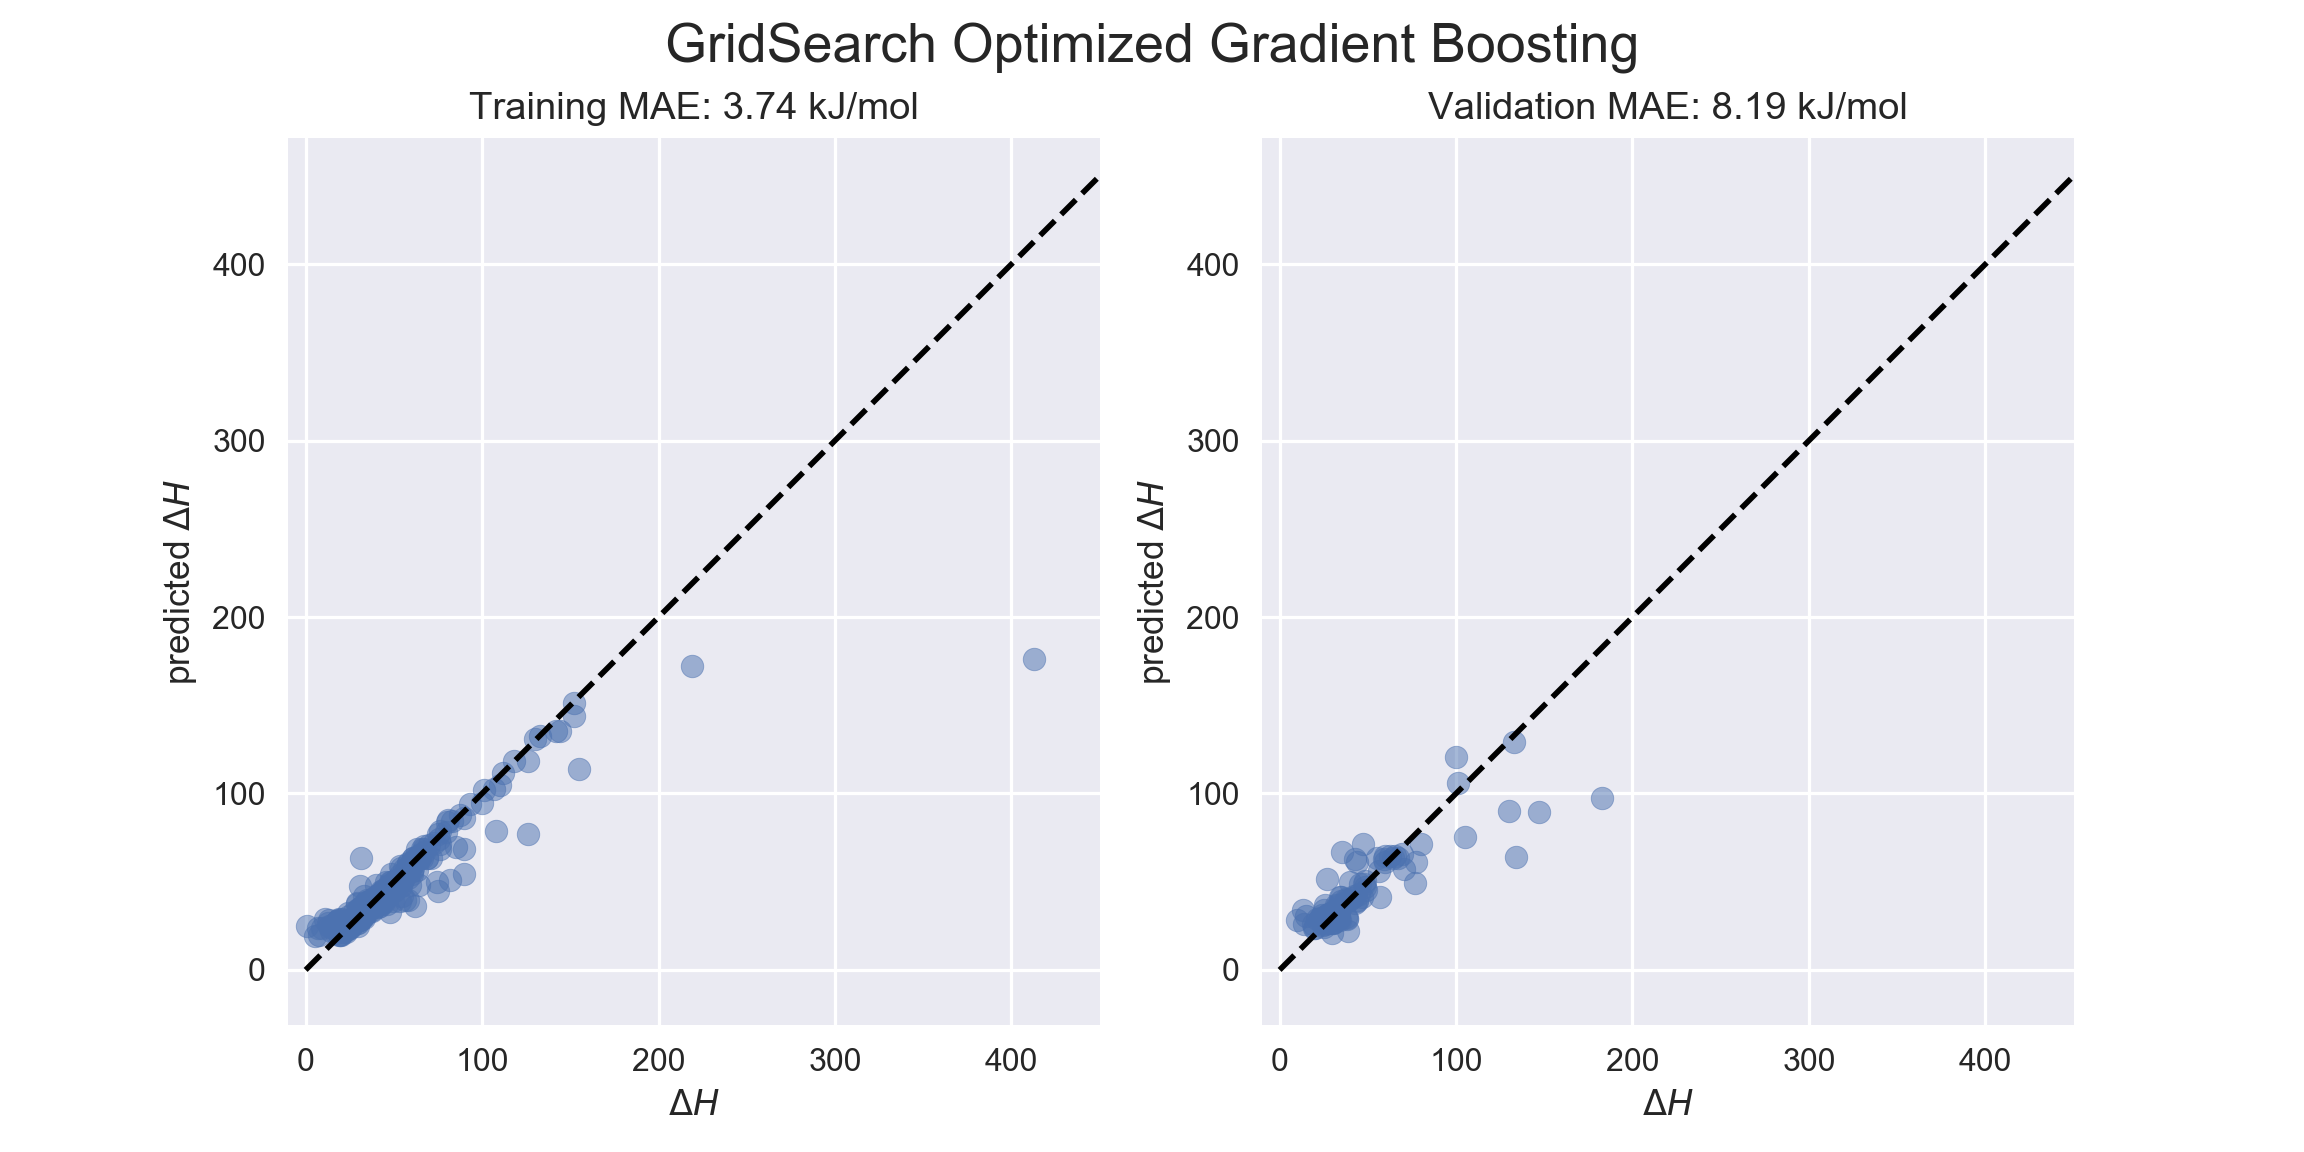

Text(0.5,0.98,'GridSearch Optimized Gradient Boosting')

In [394]:
reg1 = clone(reg.best_estimator_)
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, reg1.fit(X_train,y_train).predict(X_train), newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val, reg1.fit(X_train,y_train).predict(X_val), newfig=False, title='Validation ')
plt.gcf().suptitle('GridSearch Optimized Gradient Boosting')

Even the "best estimator" severely mis-predicts the high ∆H cases, probably due to a lack of data.

## What is this model?

So it's a "Gradient Boosting Regressor", which means that it built up an ensemble of decision trees in an ad-hoc manner to iteratively decrease the testing residual. But what are these decision trees? And how are they deciding?

<IPython.core.display.Javascript object>


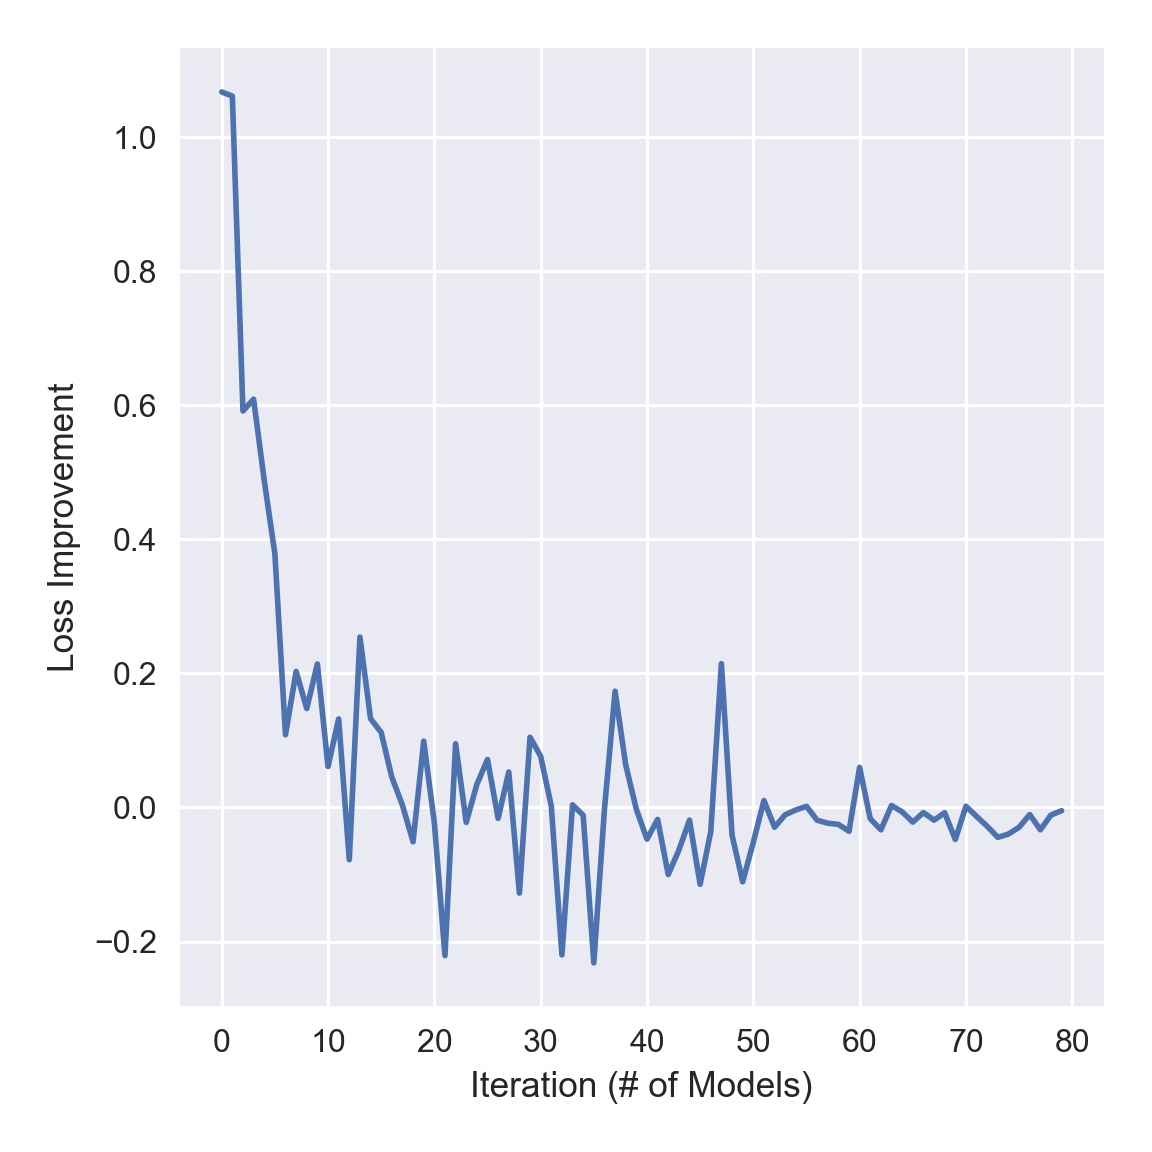

Text(0.5,0,'Iteration (# of Models)')

In [395]:
plt.figure(figsize=(5,5))
plt.plot(reg1.oob_improvement_)
plt.ylabel('Loss Improvement')
plt.xlabel('Iteration (# of Models)')

Can we dig into what each tree is doing?

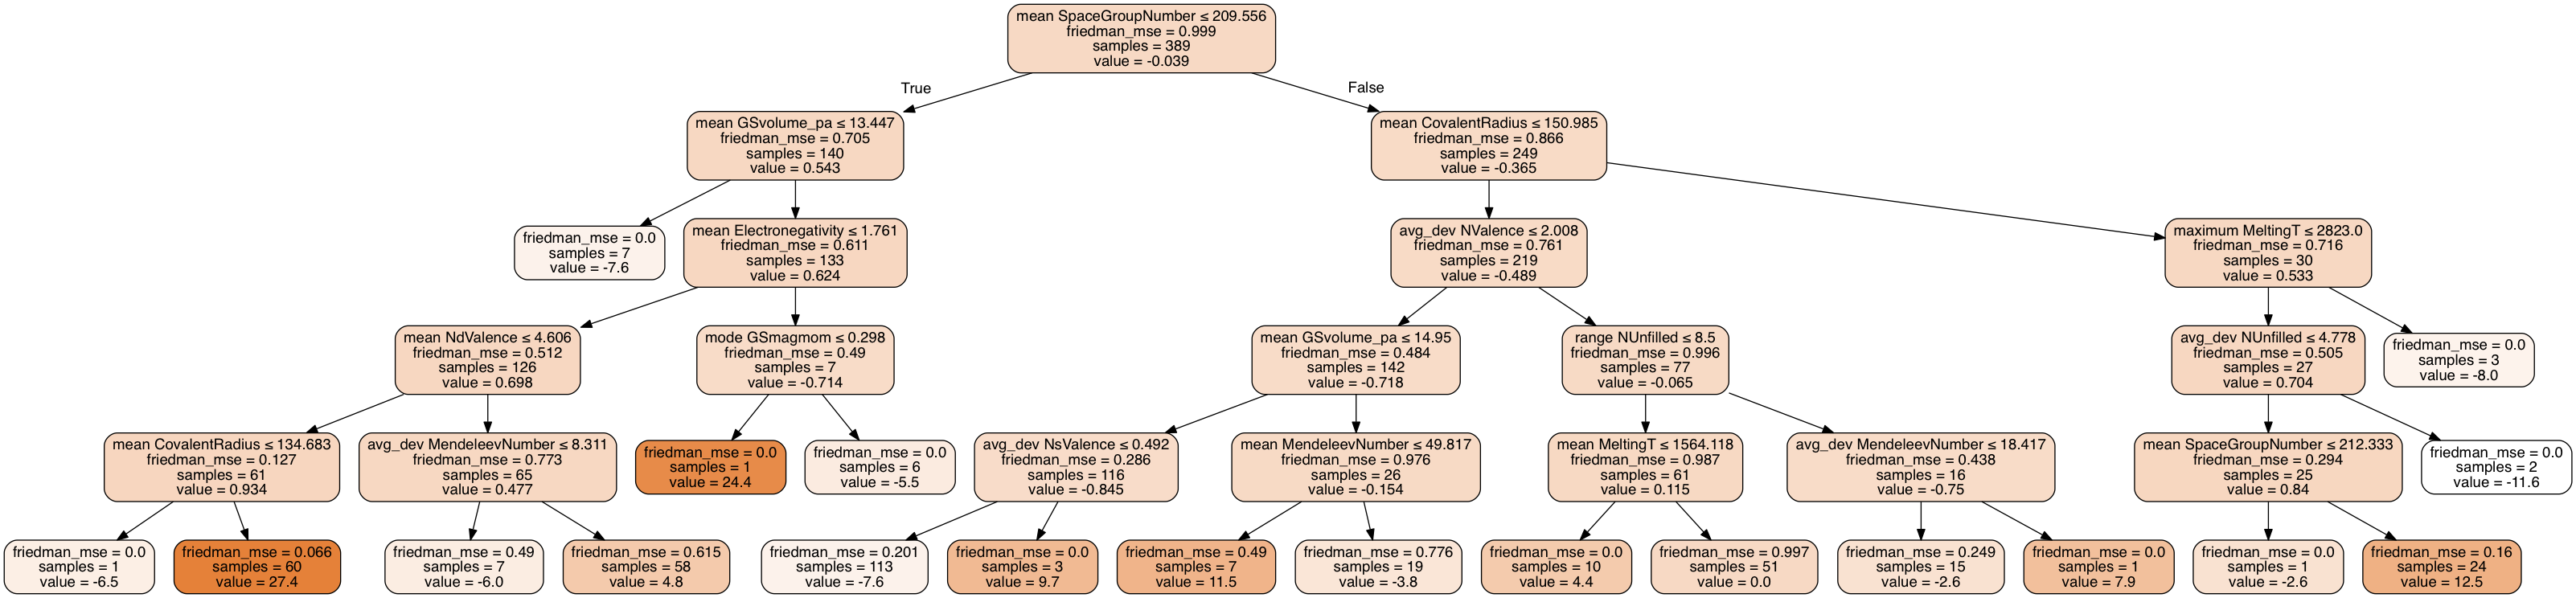

In [396]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

tree_num = 0
dot_data = StringIO()
export_graphviz(reg1.estimators_[tree_num,0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

This is the first tree - it operates on "mean SpaceGroupNumber"... these all get a bit muddy after a while. The color corresponds to the leaf value (the regression output). This tree, for example, would not be able to predict a ∆H > 28.6. So this starts to explain why our predictions seem to be capped at moderate values.

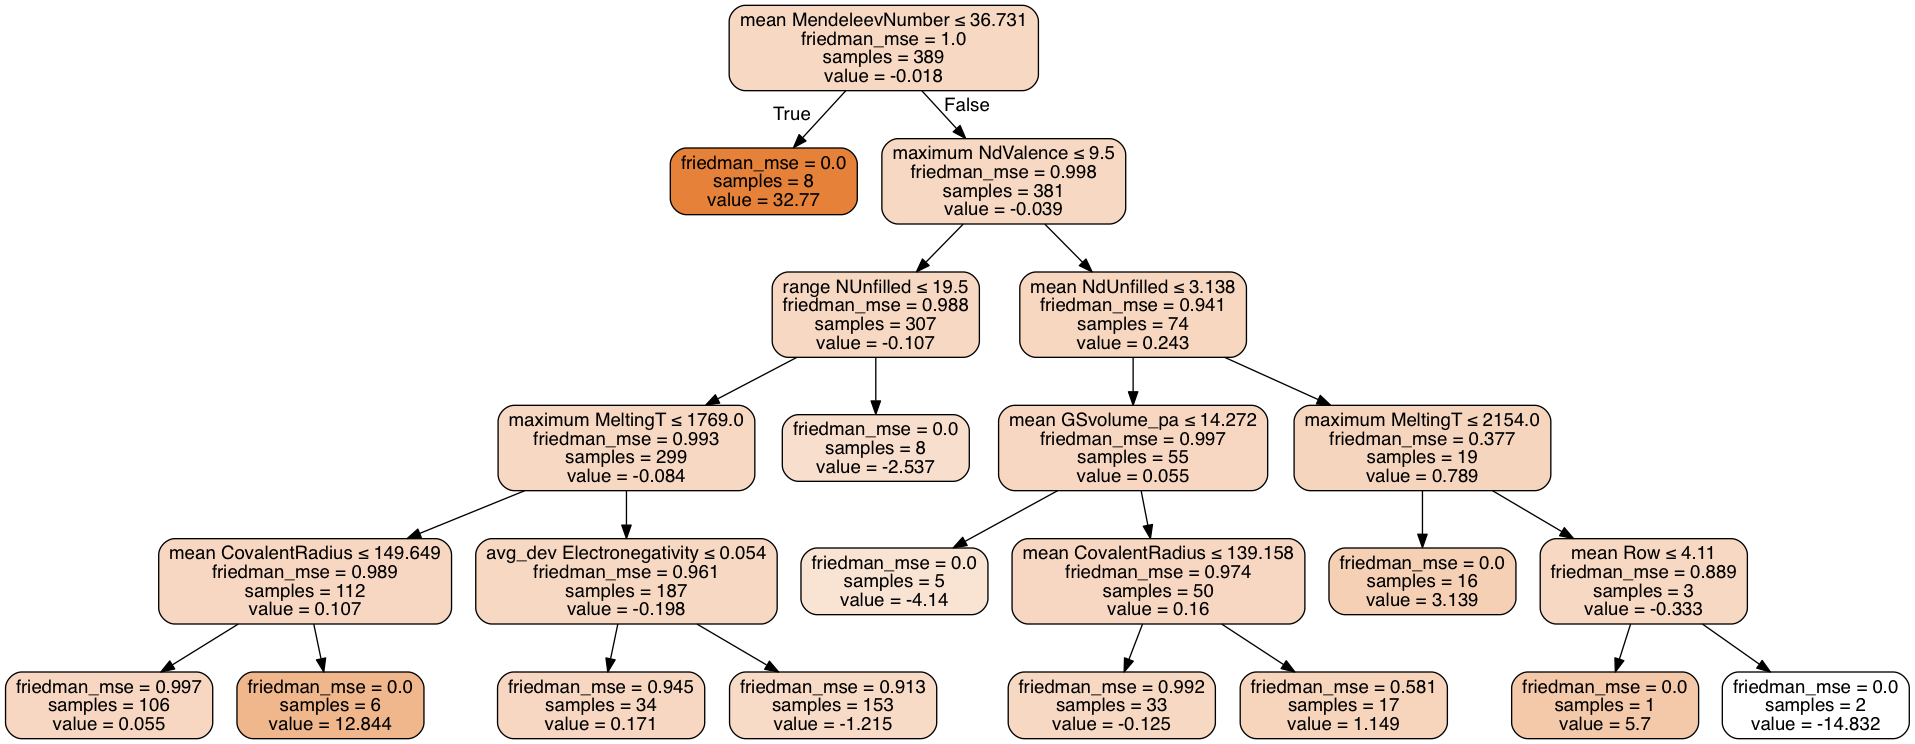

In [397]:
tree_num = 26
dot_data = StringIO()
export_graphviz(reg1.estimators_[tree_num,0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

Every once in a while you run into a tree like this, where it has a special 1-sample node for the higher ∆H values. They are few and far between, maybe explaining why the training has a hard time fitting the extreme values. We can increase the min_samples per leaf to remove these oddities.

<IPython.core.display.Javascript object>


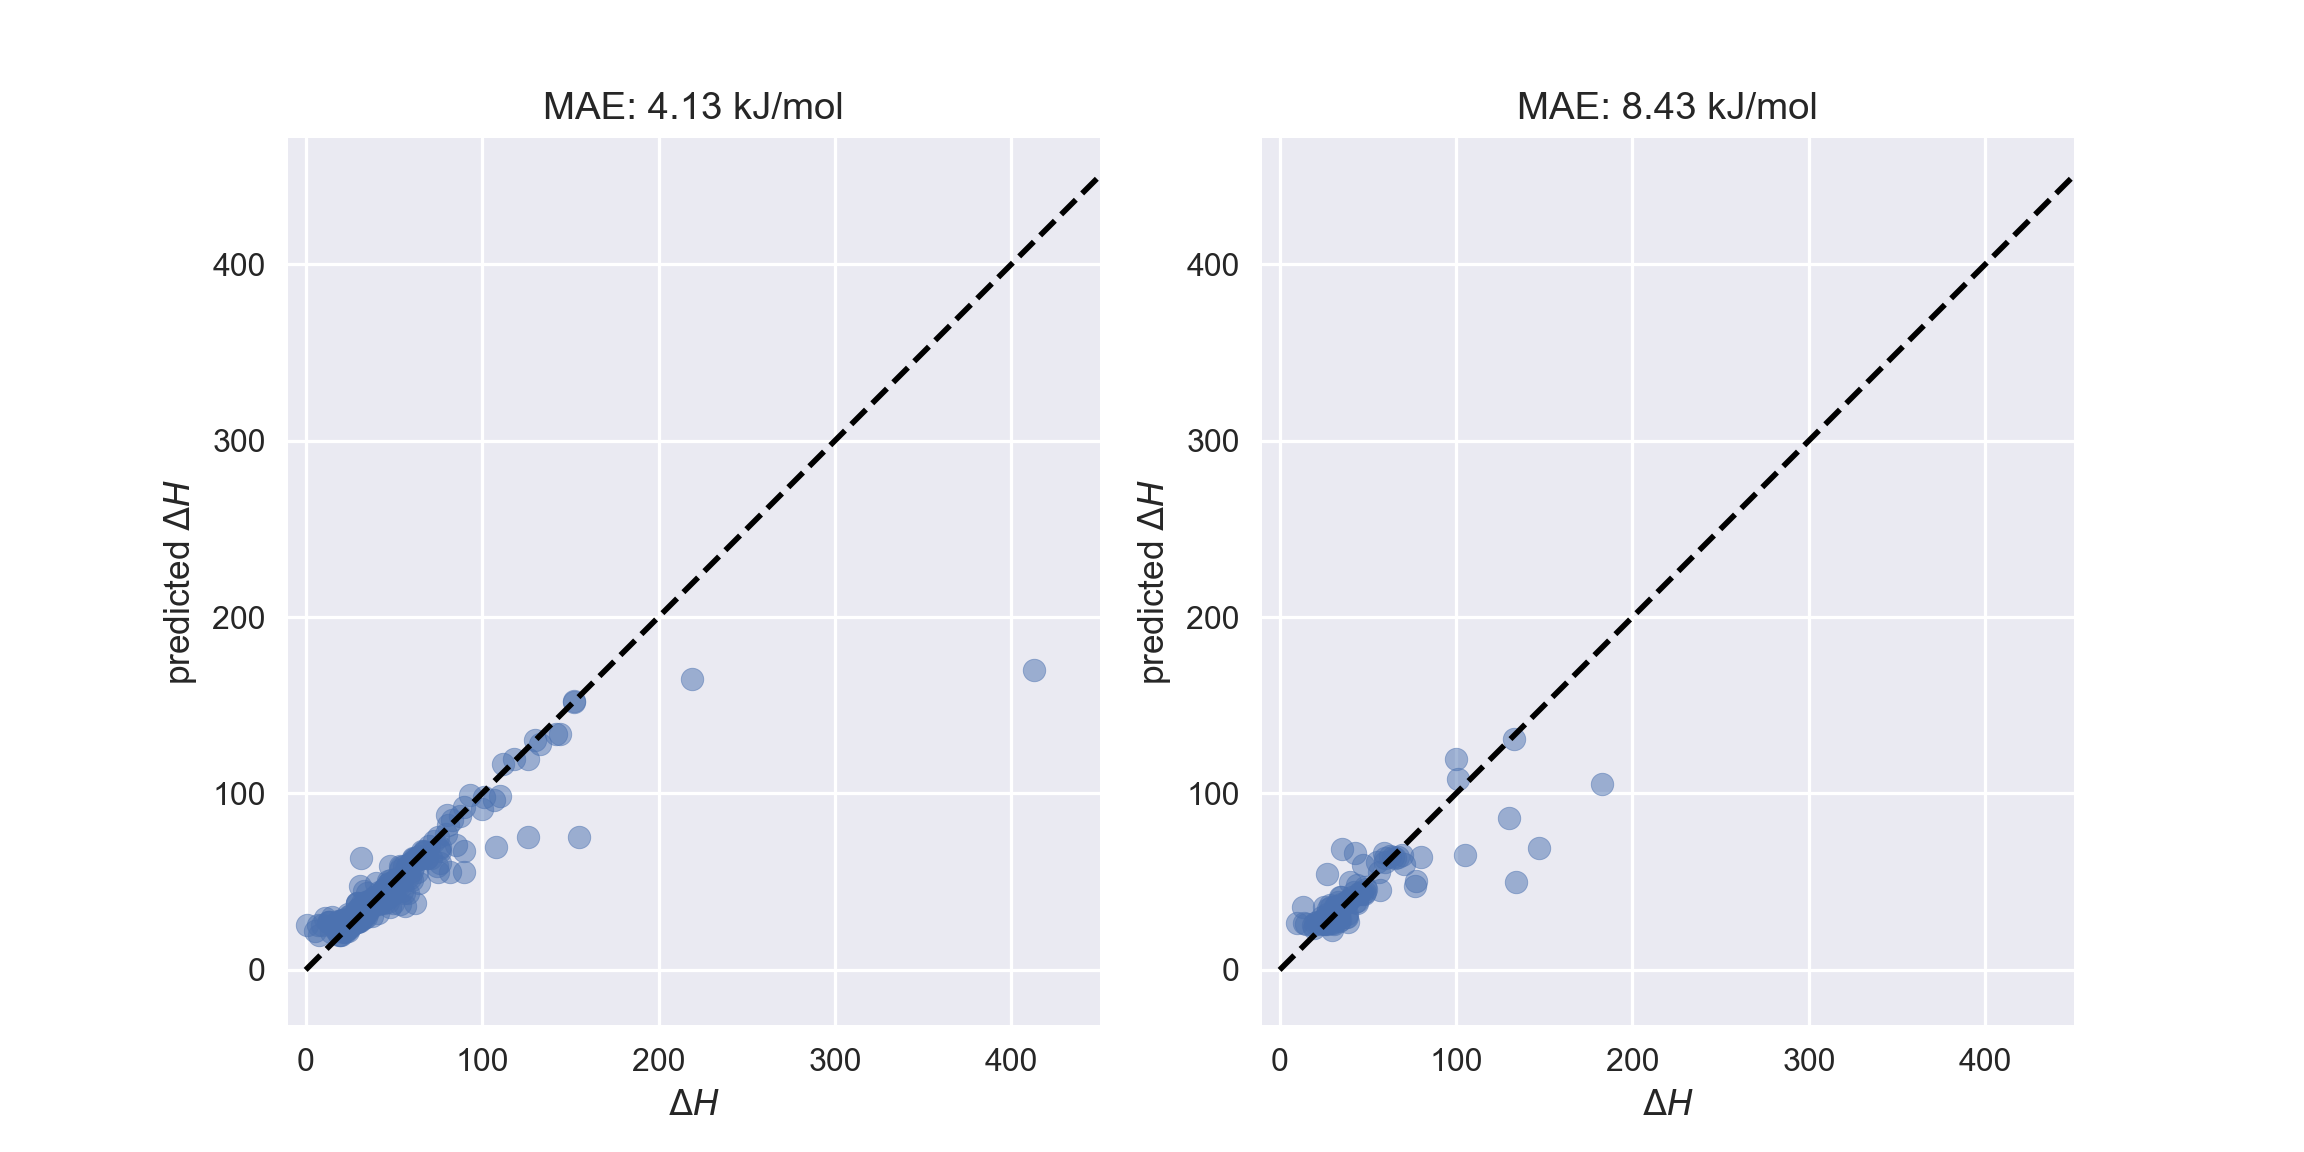

In [398]:
# reg1.n_estimators=120
reg1.min_samples_leaf=3
# reg1.max_depth=4
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, reg1.fit(X_train,y_train).predict(X_train), newfig=False)
plt.subplot(1,2,2)
parity_plot(y_val, reg1.fit(X_train,y_train).predict(X_val), newfig=False)

## Feature importance

Is there a way to rank the importance of each feature?

In [317]:
df_feats = pd.DataFrame({'feat': X_val.columns,
                         'imp': reg1.feature_importances_,
                         'std': np.std([tree.feature_importances_ for tree in reg1.estimators_[:,0]], axis=0)})
df_feats.sort_values('imp', ascending=False, inplace=True)
df_feats[:10]

,feat,imp,std
111,mean GSvolume_pa,0.060253,0.110495
45,mean Electronegativity,0.052877,0.077886
39,mean CovalentRadius,0.051463,0.087051
129,mean SpaceGroupNumber,0.047410,0.096225
22,avg_dev MeltingT,0.041176,0.075840
76,avg_dev NValence,0.038999,0.075795
21,mean MeltingT,0.036805,0.072580
124,avg_dev GSmagmom,0.033247,0.074797
106,avg_dev NUnfilled,0.029626,0.067319
64,avg_dev NdValence,0.029073,0.066151


Prettttayyy big error bars on those feature importances... but then again, this is a Gradient Boosting regressor, meaning that each subsequent tree is trying to correct the residual of the previous.

In [318]:
# Check random forest as well
reg_rf = df_ens.loc[1,'estimator']
df_feats_rf = pd.DataFrame({'feat': X_val.columns,
                         'imp': reg_rf.feature_importances_,
                         'std': np.std([tree.feature_importances_ for tree in reg_rf.estimators_], axis=0)})
df_feats_rf.sort_values('imp', ascending=False, inplace=True)
df_feats_rf[:10]

,feat,imp,std
39,mean CovalentRadius,0.175125,0.197098
36,minimum CovalentRadius,0.121757,0.193771
111,mean GSvolume_pa,0.116179,0.117498
28,avg_dev Column,0.094269,0.125089
93,mean NdUnfilled,0.056993,0.092647
76,avg_dev NValence,0.045897,0.063085
27,mean Column,0.043728,0.043608
113,mode GSvolume_pa,0.041914,0.113515
41,mode CovalentRadius,0.025775,0.051233
45,mean Electronegativity,0.022426,0.040180


Let's score feature importance by summing their importances between RF and GB

In [335]:
df_feats_score = pd.DataFrame({'feat':df_feats.sort_values('feat')['feat'],
                               'total_imp': df_feats_rf.sort_values('feat')['imp'] + df_feats.sort_values('feat')['imp']})
df_feats_score = df_feats_score.sort_values('total_imp', ascending=False)
df_feats_score[:10]

,feat,total_imp
39,mean CovalentRadius,0.226588
111,mean GSvolume_pa,0.176432
36,minimum CovalentRadius,0.123722
28,avg_dev Column,0.106992
76,avg_dev NValence,0.084895
45,mean Electronegativity,0.075302
93,mean NdUnfilled,0.075221
129,mean SpaceGroupNumber,0.056964
27,mean Column,0.055100
113,mode GSvolume_pa,0.043801


<IPython.core.display.Javascript object>


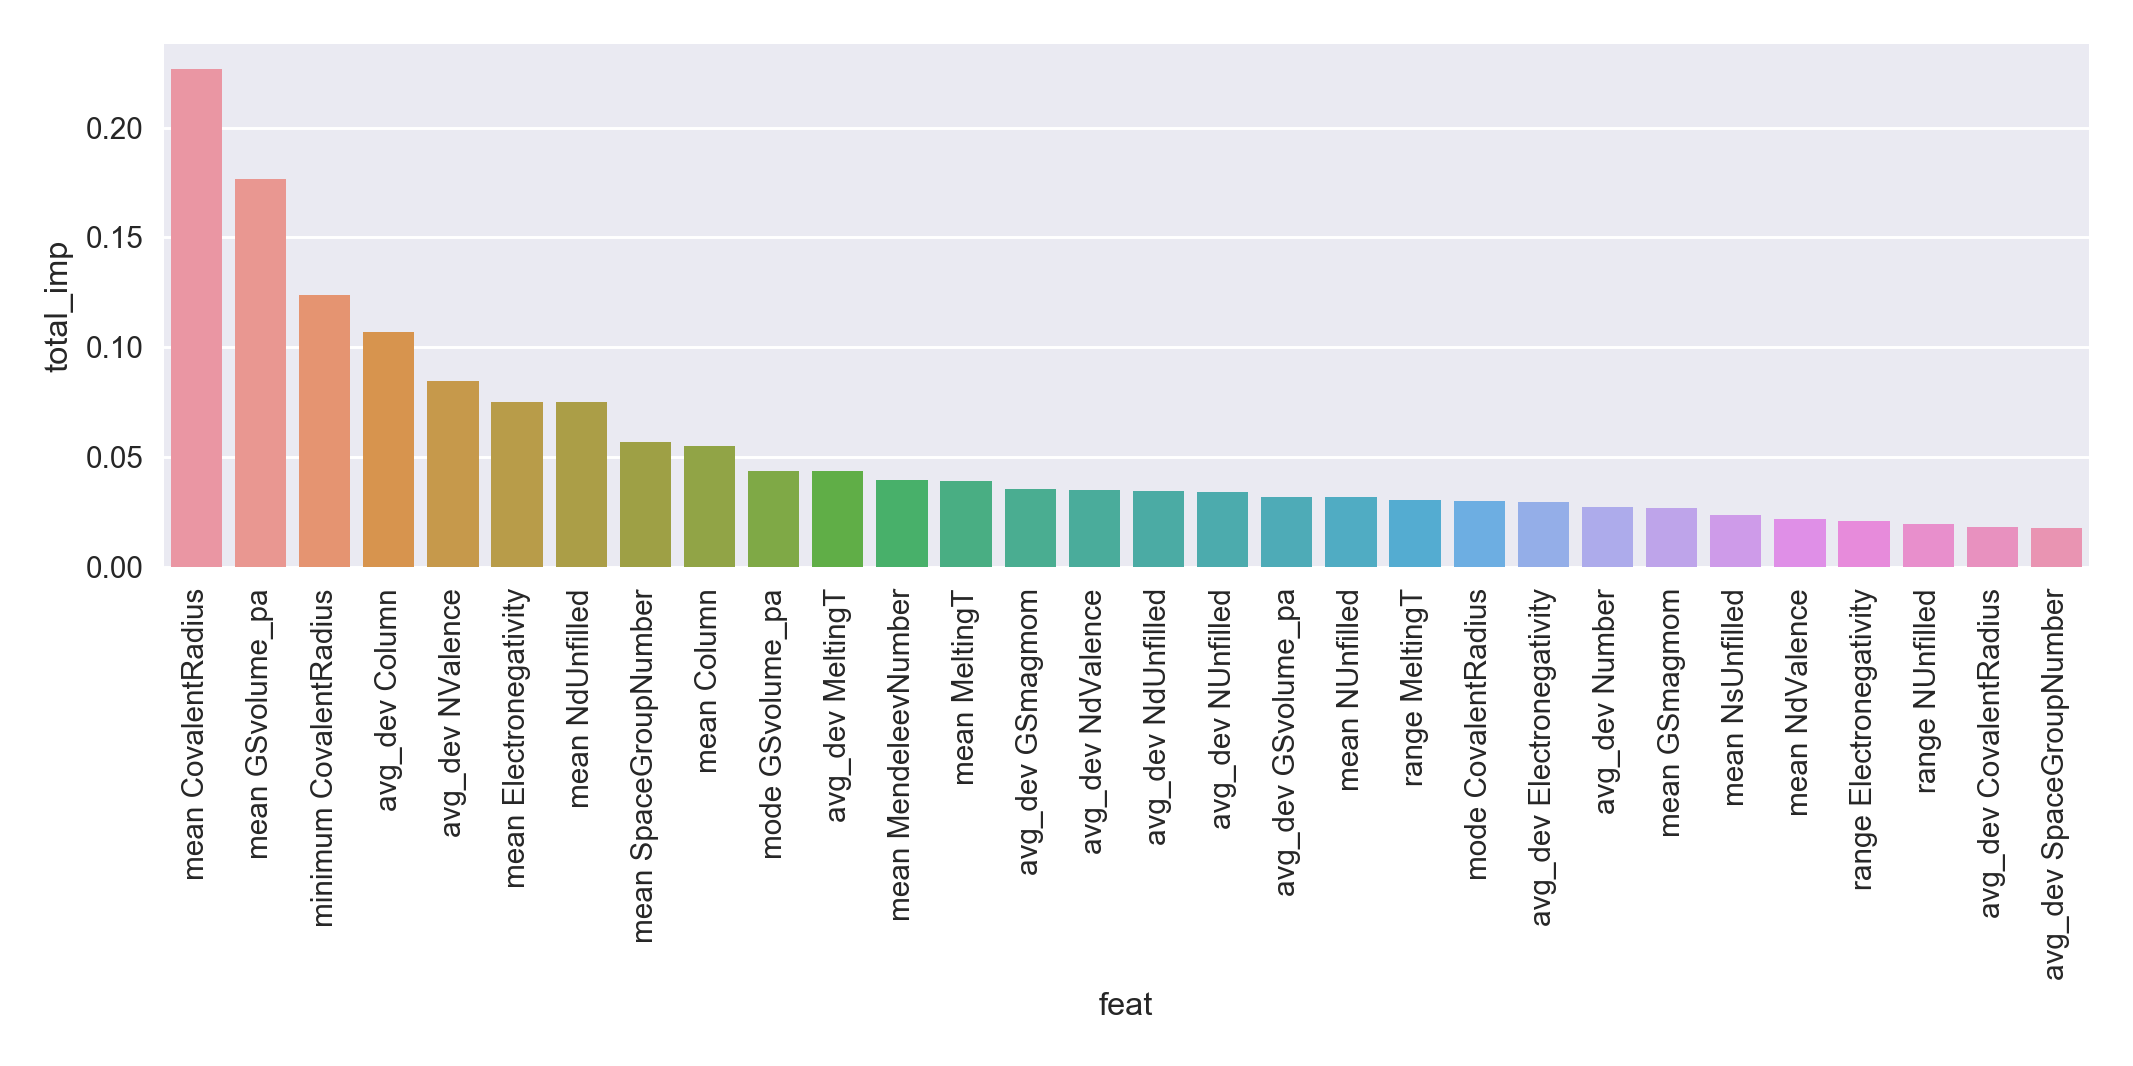

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

In [438]:
plt.figure(figsize=(10,5))
sns.barplot(x='feat',y='total_imp',data=df_feats_score[:30])
plt.xticks(rotation=90)

These are the top 10 most important features between both random forest and gradient boosting

Let's go all the way back to the data. What are the points with the highest ∆H?

In [336]:
df['dH'] = df['Heat of Formation (kJ/mol H2)']
df.sort_values('dH', ascending=False).head()

,Material Class,Composition Formula,Hydrogen Weight Percent,Heat of Formation (kJ/mol H2),Temperature (˚C),Pressure (Atmospheres Absolute),Author Year,Reference Number,Comment1,Comment2,Comment3,composition,dH
413,AB2,ThZr2,0.5,413,910,0.08,"Bartscher, 1988",556,NaN,NaN,NaN,"(Th, Zr)",413
2715,SS,Zr.975Nb.025,2.2,219,800,0.2,"Sinha, 1970",472,NaN,NaN,NaN,"(Zr, Nb)",219
43,A2B,Zr2Ni,1.3,183,604,0.003,"Pebler, 1966",12,NaN,NaN,NaN,"(Zr, Ni)",183
938,AB2,ZrV2,2.4,155,NaN,NaN,"Pebler, 1967",13,NaN,NaN,NaN,"(Zr, V)",155
2156,MIC,La7Ni3,1.7,152,NaN,NaN,"Busch, 1978",189,NaN,NaN,NaN,"(La, Ni)",152


Let's look at the 5 highest ∆H materials, with the top 8 features

In [337]:
X.loc[df.sort_values('dH', ascending=False).index.values[:5],
      df_feats_score['feat'].iloc[:8]]

,mean CovalentRadius,mean GSvolume_pa,minimum CovalentRadius,avg_dev Column,avg_dev NValence,mean Electronegativity,mean NdUnfilled,mean SpaceGroupNumber
413,185.333333,26.253333,175.0,0.444444,0.000000,1.320000,8.000000,204.333333
2715,174.725000,23.069625,164.0,0.048750,0.048750,1.336750,7.950000,194.875000
43,158.000000,18.903333,124.0,2.666667,2.666667,1.523333,6.000000,204.333333
938,160.333333,16.405000,153.0,0.444444,0.444444,1.530000,7.333333,217.333333
2156,182.100000,28.924250,124.0,2.940000,2.940000,1.343000,6.900000,203.300000


We can also look at these in terms of "standardized" features

In [338]:
X_std.loc[df.sort_values('dH', ascending=False).index.values[:5],
          df_feats_score['feat'].iloc[:8]]

,mean CovalentRadius,mean GSvolume_pa,minimum CovalentRadius,avg_dev Column,avg_dev NValence,mean Electronegativity,mean NdUnfilled,mean SpaceGroupNumber
413,4.990140,3.879339,5.348036,-1.573224,-1.640918,-2.150219,2.058170,-0.660824
2715,3.702290,2.714585,4.092969,-1.979028,-1.598163,-2.052572,2.033951,-1.518161
43,1.671878,1.190356,-0.470914,0.705774,0.697813,-0.964851,1.089414,-0.660824
938,1.955144,0.276346,2.837901,-1.573224,-1.251129,-0.925987,1.735251,0.517543
2156,4.597614,4.856488,-0.470914,0.986090,0.937533,-2.016136,1.525354,-0.754489


In [339]:
pd.concat([df.sort_values('dH', ascending=False).head()[['Material Class','Composition Formula','dH']],
          X_std.loc[df.sort_values('dH', ascending=False).index.values[:5],
          df_feats_score['feat'].iloc[:5]]],
          axis=1)

,Material Class,Composition Formula,dH,mean CovalentRadius,mean GSvolume_pa,minimum CovalentRadius,avg_dev Column,avg_dev NValence
413,AB2,ThZr2,413,4.990140,3.879339,5.348036,-1.573224,-1.640918
2715,SS,Zr.975Nb.025,219,3.702290,2.714585,4.092969,-1.979028,-1.598163
43,A2B,Zr2Ni,183,1.671878,1.190356,-0.470914,0.705774,0.697813
938,AB2,ZrV2,155,1.955144,0.276346,2.837901,-1.573224,-1.251129
2156,MIC,La7Ni3,152,4.597614,4.856488,-0.470914,0.986090,0.937533


Ok, so high GSvolume_pa, high Covalent Radius...

Let's look at one of these guys.

In [340]:
df.loc[938]

Material Class                              AB2
Composition Formula                        ZrV2
Hydrogen Weight Percent                     2.4
Heat of Formation (kJ/mol H2)               155
Temperature (˚C)                            NaN
Pressure (Atmospheres Absolute)             NaN
Author Year                        Pebler, 1967
Reference Number                             13
Comment1                                    NaN
Comment2                                    NaN
Comment3                                    NaN
composition                             (Zr, V)
dH                                          155
Name: 938, dtype: object

I'll say one thing: Zirconium seems to be the common denominator among the top candidates.

These Magpie features must be somewhat correlated...

<IPython.core.display.Javascript object>


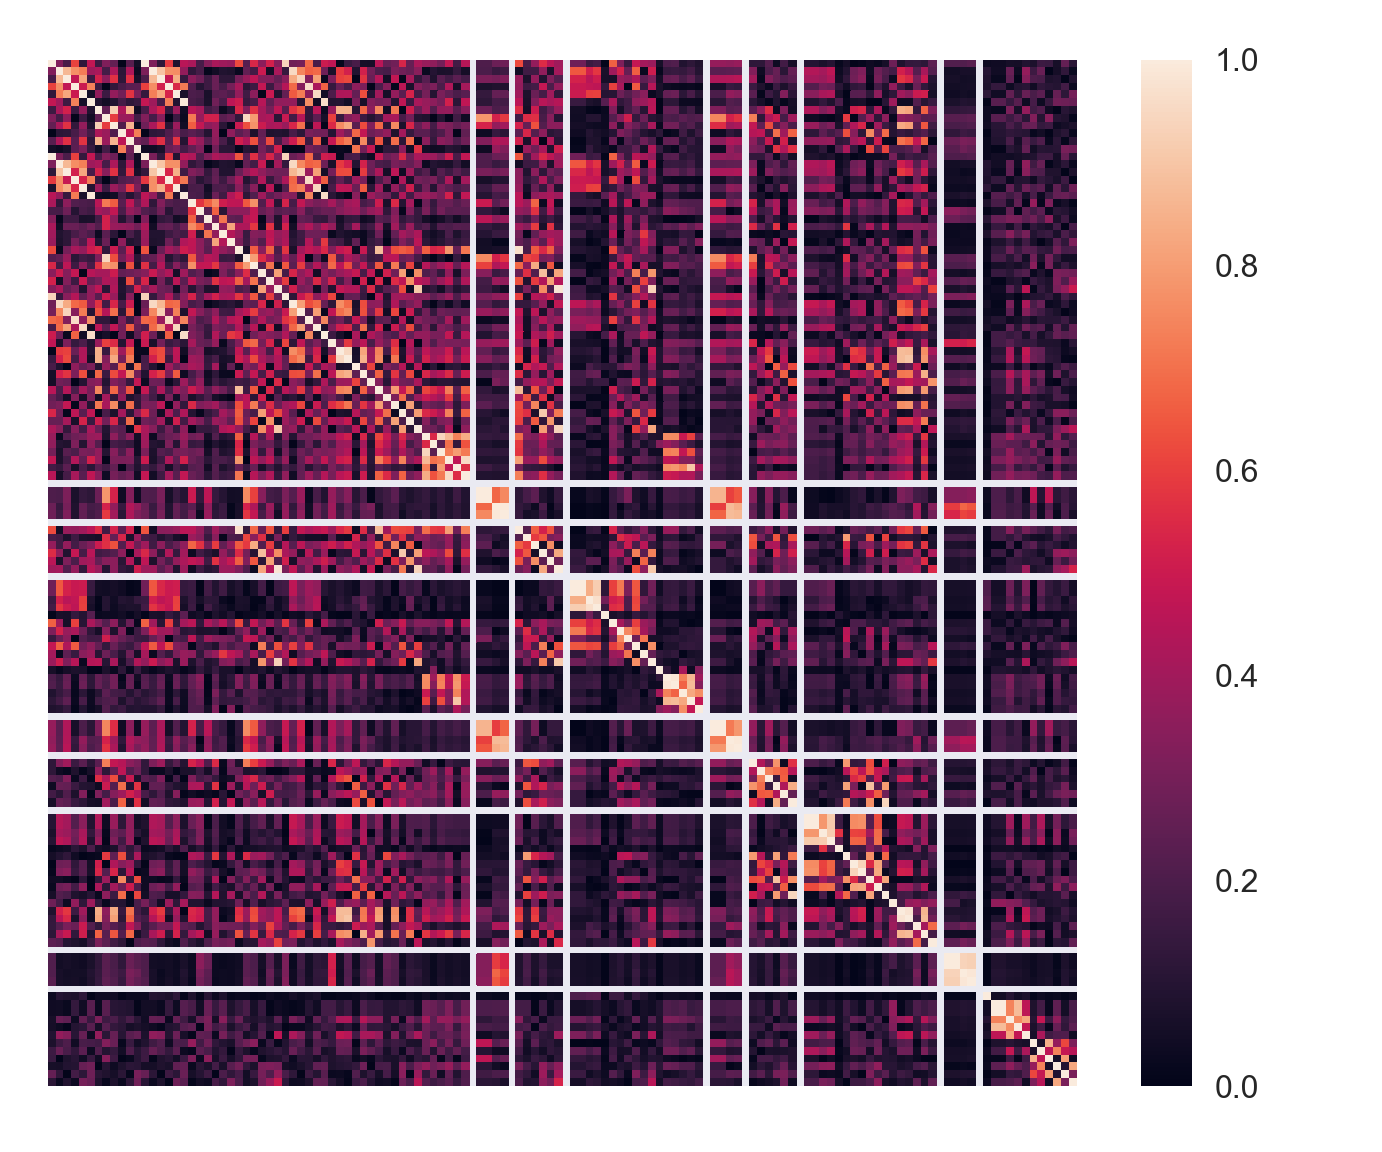

In [374]:
import seaborn as sns
plt.figure(figsize=(6,5))
sns.heatmap(X.corr().abs(), vmin=0, vmax=1, annot=False,
            xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


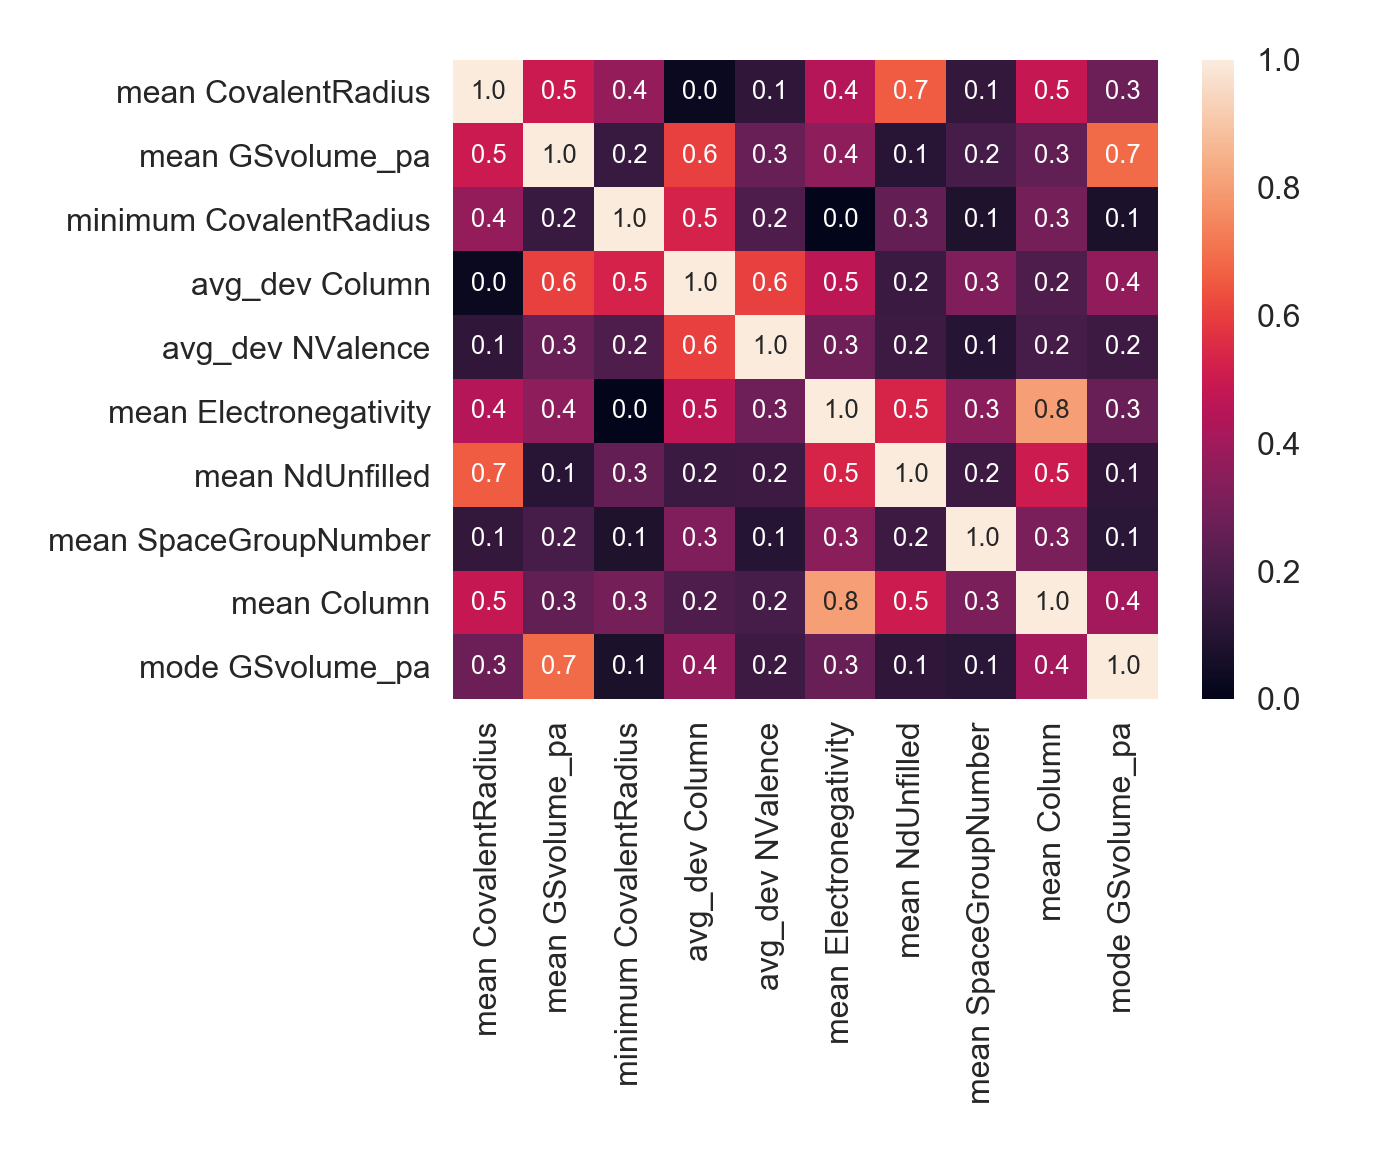

In [381]:
plt.figure(figsize=(6,5))
sns.heatmap(X[df_feats_score['feat'].iloc[:10]].corr().abs(),
            annot=True, fmt='.1f', vmin=0, vmax=1, annot_kws={"size": 8})

In [301]:
corr_matrix = X.corr().abs()

pair_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

pair_corr

maximum NfUnfilled         range NfUnfilled            1.000000
maximum GSbandgap          range GSbandgap             1.000000
maximum NpValence          range NpValence             1.000000
maximum NpUnfilled         range NpUnfilled            1.000000
maximum NfValence          range NfValence             1.000000
maximum GSmagmom           range GSmagmom              1.000000
maximum Number             maximum AtomicWeight        0.999385
mean Number                mean AtomicWeight           0.997390
minimum Number             minimum AtomicWeight        0.997253
avg_dev Number             avg_dev AtomicWeight        0.996674
range Number               range AtomicWeight          0.996482
mode Number                mode AtomicWeight           0.995490
mean NpUnfilled            avg_dev NpUnfilled          0.990041
mean NpValence             avg_dev NpValence           0.988877
mean GSbandgap             avg_dev GSbandgap           0.987993
maximum NsUnfilled         range NsUnfil

## Let's try a Grid Search on Bagging, just for completeness

In [420]:
df_ens

,name,scores,estimator,mae,mae_std
1,RandomForestRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",9.152006,2.428187
4,BaggingRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",8.631019,2.005677
6,GradientBoostingRegressor,train val ...,([DecisionTreeRegressor(criterion='friedman_ms...,8.500652,1.866287
7,AdaBoostRegressor,train val ...,"(DecisionTreeRegressor(criterion='mse', max_de...",11.671918,2.125787


In [421]:
estimator = clone(df_ens.loc[4,'estimator'])
estimator

BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [422]:
parameters = {'n_estimators': [10, 20, 50, 100],
              'max_features': [0.5, 0.75, 1]
             }
reg_rf_grid = GridSearchCV(estimator, parameters, cv=10)
reg_rf_grid.fit(X, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100], 'max_features': [0.5, 0.75, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [423]:
df_res_rf = pd.DataFrame(reg_rf_grid.cv_results_)
df_res_rf.sort_values('rank_test_score')[['param_n_estimators','param_max_features','mean_test_score','std_test_score']][:5]

,param_n_estimators,param_max_features,mean_test_score,std_test_score
3,100,0.5,0.245659,0.259914
7,100,0.75,0.233154,0.312676
2,50,0.5,0.230050,0.277115
6,50,0.75,0.213231,0.310812
1,20,0.5,0.185804,0.276515


The standard deviation of the testing score is very large for each hyperparameter set. It seems not to matter very much. Let's go with the "top ranked" model anyway.

<IPython.core.display.Javascript object>


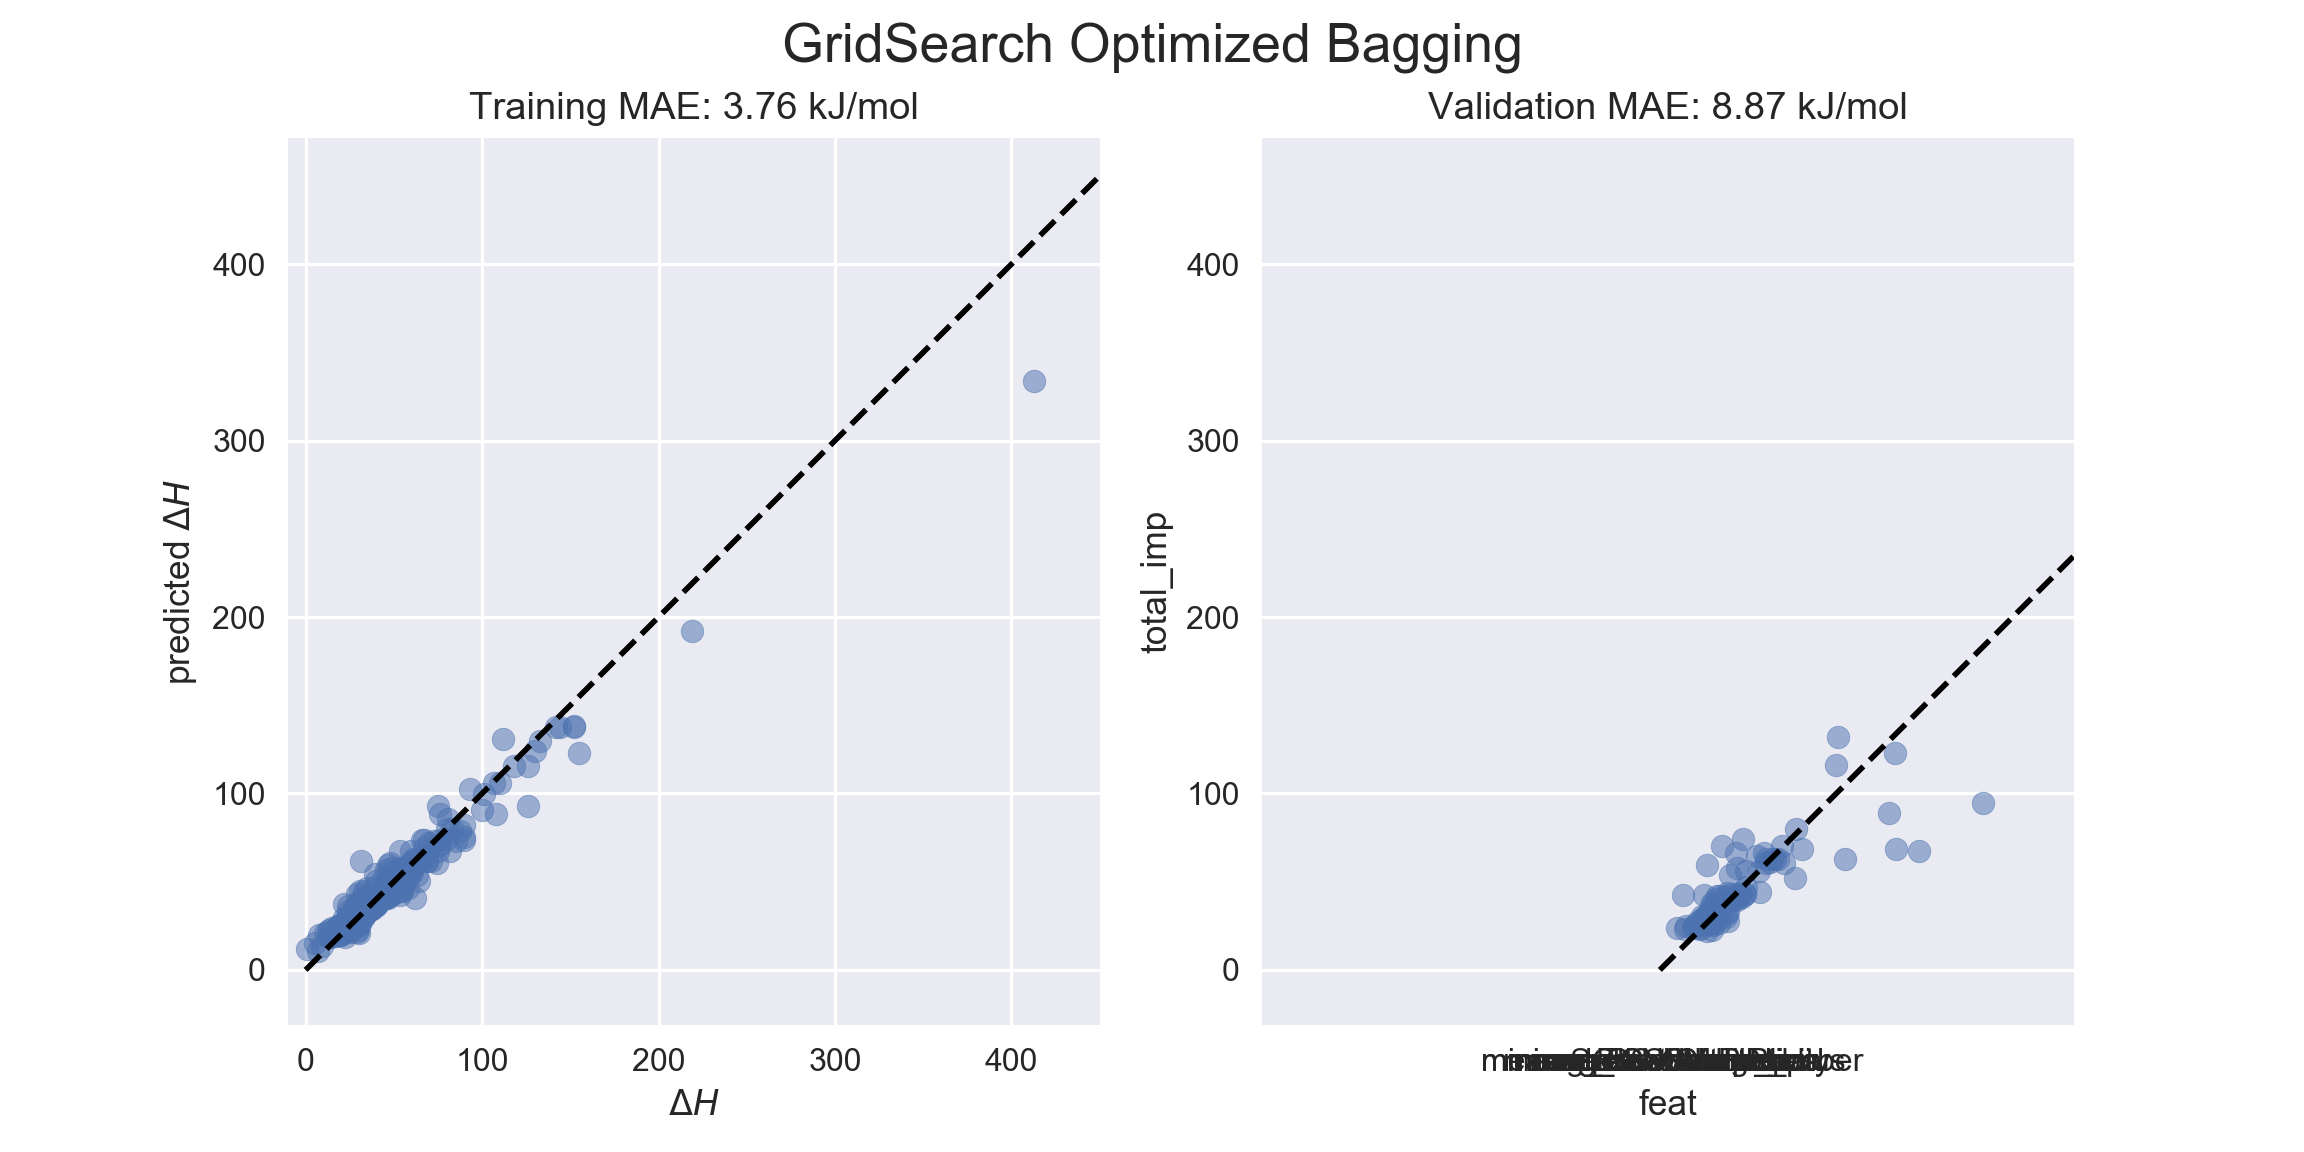

Text(0.5,0.98,'GridSearch Optimized Bagging')

In [424]:
reg1_rf = clone(reg_rf_grid.best_estimator_)
plt.figure(figsize=(10,5), tight_layout=False)
plt.subplot(1,2,1)
parity_plot(y_train, reg1_rf.fit(X_train,y_train).predict(X_train), newfig=False, title='Training ')
plt.subplot(1,2,2)
parity_plot(y_val, reg1_rf.fit(X_train,y_train).predict(X_val), newfig=False, title='Validation ')
plt.gcf().suptitle('GridSearch Optimized Bagging')

Even the "best estimator" severely mis-predicts the high ∆H cases, probably due to a lack of data.

### 5. Digging deeper

Here are some primer questions to inspire you. These suggestions are roughly ordered according to how deep we think you'll need to dig in order to answer them.

Save your predictions for the independent test set from your favorite model -- we'll evaluate them at the end of the challenge!

#### Is linear regression better than (or as good as) random forest?
Can you train a regularized linear model that is better (or as good as) the RF model?

(Hint: make sure you re-compute the standardization on just the training set for each validation fold -- look into scikit-learn pipelines)

#### Do solid-solution compounds help?
There are no solid solutions in the hold-out set.... Does it help or hurt to include them in the training set?

#### Does it help to add structural information?
- Does it help to add structural information to your model? (e.g. the 'Material Class' column)
- What about training separate models for each different structure class?

#### Dealing with duplicate and near-duplicate compositions
There are a non-trivial number of  duplicate and near-duplicate compositions in the dataset -- with the randomized cross-validation procedure we've been using, it's possible that the same composition shows up in both training and validation sets.
- Does this significantly bias the estimated generalization performance? (To address this question, you might find helpful the example code on creating fair train/val splits at the end of the notebook.)

#### Model selection
Choose your favorite model from the MLMR workshop and do some hyperparameter tuning. Can you get better predictive performance?

#### Feature engineering
Magpie includes a diverse set of numerical and categorical properties of the elements. Some of the features in the magpie feature set may be more relevant than others to predicting the quality of hydrogen storage materials. (Consider e.g. the composition-averaged space group number....)
- can you train a model (need not be a random forest) with competetive performance using a hand-picked or automatically selected subset of magpie features?
- Consider using alternative features. (Check out some of the other feature sets available in [matminer](https://github.com/hackingmaterials/matminer), or come up with your own)

#### Example code for fair train/val splitting

In [17]:
# do a fair train/val split by splitting out unique compositions together, so that no unique composition shows up in both train and val
compositions = df.composition.apply(str).unique()
C_train, C_test = model_selection.train_test_split(compositions, test_size=0.25, random_state=42)

X_train = X[df.composition.apply(str).isin(C_train)]
y_train = y[df.composition.apply(str).isin(C_train)]

X_test = X[df.composition.apply(str).isin(C_test)]
y_test = y[df.composition.apply(str).isin(C_test)]

# standardize the input features for linear regression
# can skip this for e.g. random forest...
std = preprocessing.StandardScaler()
std.fit(X_train)
X_train, X_test = std.transform(X_train), std.transform(X_test)

In [18]:
# instead, do a fair train/val split by splitting out nearly-unique compositions separately
# this should split compounds up by considering only their constituent elements
compositions = df.composition.unique()
C_train, C_test = model_selection.train_test_split(compositions, test_size=0.25, random_state=42)

X_train = X[df.composition.isin(C_train)]
y_train = y[df.composition.isin(C_train)]

X_test = X[df.composition.isin(C_test)]
y_test = y[df.composition.isin(C_test)]

# standardize the input features for linear regression
# can skip this for e.g. random forest...
std = preprocessing.StandardScaler()
std.fit(X_train)
X_train, X_test = std.transform(X_train), std.transform(X_test)